# **Ouroboros EEG-fMRI NF: Predicting EEG activity, fMRI activity and NF scores**

#### Version: 28th October 2022

==============================================================================================

Project developed by Maël Donoso, Ph.D. in Cognitive and Computational Neuroscience. Affiliations: Ouroboros Neurotechnologies (https://ouroboros-neurotechnologies.com/), Institut Lémanique du Cerveau (https://institut-cerveau.ch/), Policlinique Ostéopathique de Lausanne (https://policlinique-osteopathique-lausanne.ch/). 

==============================================================================================

This project is presented through six Notebooks:

***01: Data Analysis***

*02: Classification* (all classification models except neural networks)

*03: Neural Networks*

*04: Regression on fMRI Data*

*05: Regression on EEG Data*

*06: Results*

==============================================================================================

### Notebook 01

# **Data Analysis**

## **1. Introduction**

### 1.1 Context

**Neurofeedback (NF)** consists in providing real-time information to a subject about his/her own brain activity, and asking this subject to try to adapt his/her behavior according to this measure. The objective is to reach a certain brain state, typically by increasing the activity in a specific brain region or the power of a specific frequency band. Therefore, NF is basically a brain training technology, allowing the subject to learn self-regulation. The brain activity can be measured through a variety of techniques, but **Electroencephalography (EEG)** and **functional Magnetic Resonance Imaging (fMRI)** are the two main choices. Most NF training protocols rely on a single technique, but recent studies have shown the potential of combining several approaches. Indeed, while EEG measures the electrical activity of the brain, using electrodes placed on the head, fMRI on the other hand measures the activity of the brain indirectly, by detecting the changes in the cerebral blood flow. EEG is typically used to record activity of the cortical areas, while fMRI can detect activity in the subcortical regions as well. EEG has a good temporal resolution, while fMRI has a good spatial resolution. Therefore, these two approaches are very complementary, and their integration in the field of NF is particularly promising. We refer to these combined trainings as **EEG-fMRI NF trainings**. 

### 1.2 Problem

In a typical NF training, a single technique is used to measure brain activity. Then, a single feedback modality, typically visual, auditive or tactile, can be used to present this information to the subject. In contrast, in an EEG-fMRI NF training, the brain activity is measured through two different neuroimaging techniques, and the feedback provided to the subject is either bidimensional, or computed by combining the two different brain signals. Since performing a NF task can be intellectually engaging, we expect the brain state of the subject to be different according to the experimental stage, i.e. when he/she is at rest versus when he/she is performing the NF task. A simple question that arises is whether this difference can be detected by machine learning models. **Can we train machine learning models to predict the experimental stage, using either EEG or fMRI data?**

We refer to the NF scores computed from the EEG activity as the EEG NF scores, and to the NF scores computed from the fMRI activity as the fMRI NF scores. We obviously expect the EEG NF scores to be related to the EEG activity, and the fMRI NF scores to be related to the fMRI activity, but could we also make a cross-modality prediction? In other words, **can we train machine learning models to predict the EEG NF scores from the fMRI activity, and the fMRI NF scores from the EEG activity?** While the first question was a classification problem, this one is a regression problem. 

Since an EEG-fMRI NF dataset provides multiple possibilities, other questions can also be asked. For example, **can we predict EEG activity from fMRI activity, and vice versa?** A natural question that arises in EEG-fMRI studies is the degree of redundancy, or shared variance, between two types of neuroimaging data acquired at the same time on the same subjects. Computing NF scores adds a new layer of complexity, and allows us to ask more questions. EEG-fMRI NF datasets are still extremely rare, but it is reasonable to expect that there will be a growing interest in these types of NF trainings. **Overall, the objective of this project is to explore several ways to apply machine learning models to a given EEG-fMRI NF dataset, and to evaluate which ones result in interesting predictions.**

### 1.3 Interest

NF shows promising results for a variety of indications. The combination of EEG and fMRI could extend even further the possibilities of NF, and allow this brain training technology to be used in situations requiring both a good temporal resolution and a good spatial resolution. Machine learning could provide a link between EEG activity, fMRI activity and NF scores, and eventually be used to fine-tune NF protocols in cross-modality setups using two or more neuroimaging techniques. **For a given EEG-fMRI NF dataset, proving that machine learning models can be trained to make relevant predictions could suggest new ways to improve NF trainings in this type of setups.** If machine learning models can indeed learn interesting patterns, this knowledge could be used to adapt the session design, the NF scores computation, or any other variable relevant to NF training. 

Furthermore, as we pointed out, EEG-fMRI NF datasets are still extremely rare. At the time of writing this Notebook, there seem to be only one open access bimodal NF dataset integrating EEG and fMRI. **Exploring in depth the EEG-fMRI NF data currently at our disposal may be useful to motivate research in this field.** For this reason, this project might present an interest for the neuroimaging community involved in NF studies, particularly for those who are already familiar with NumPy, Scikit-learn and TensorFlow libraries. It might also present an interest for data scientists and machine learning developers who want to explore neuroimaging data. 

## **2. Dataset**

### 2.1 Source

In this project, we will use a dataset downloaded from OpenNeuro (https://openneuro.org/), an open data repository for neuroimaging data, where researchers can publicly store and share brain files obtained from several neuroimaging techniques, including EEG and fMRI. All brain files are stored in the Brain Imaging Data Structure (BIDS) format, a standard format for neuroimaging and behavioral data (https://bids.neuroimaging.io/). Furthermore, all newly published datasets in OpenNeuro, including the one we are going to use, are released under CC0 license (https://openneuro.org/faq), which means a public domain dedication and no copyright (https://creativecommons.org/publicdomain/zero/1.0/). 

Specifically, we will use the following dataset: **https://openneuro.org/datasets/ds002336/versions/2.0.2**. This dataset comes from the following study, conducted at Inria and other institutions: **Lioi, G., Cury, C., Perronnet, L. et al. (2020). Simultaneous EEG-fMRI during a neurofeedback task, a brain imaging dataset for multimodal data integration. Scientific Data, 7, 173, https://doi.org/10.1038/s41597-020-0498-3**. This dataset is the first open access bimodal NF dataset integrating EEG and fMRI, and has several interesting characteristics, notably: 1) It contains EEG data, fMRI data and NF scores for all subjects. 2) The article has detailed methodological sections. 3) EEG data has already been preprocessed. 4) At the time of writing this Notebook, it is a recent study, published in June 2020. 5) The article presenting this study is publicly available, and can be found here: https://www.nature.com/articles/s41597-020-0498-3. It should be noted that this dataset contains only the data from the first experiment (XP1) reported in the article. The data from the second experiment (XP2) is also accessible on OpenNeuro, but in this project, we will focus on XP1. 

**Before running this Notebook, the user should download the dataset by following the instructions on the OpenNeuro website: https://openneuro.org/datasets/ds002336/versions/2.0.2.** The path of the dataset can be defined below. 

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define the raw data path. 
data_path = '../ouroboros_eeg-fmri_nf_raw_data/'

# Define the preprocessed data path. 
preprocessed_data_path = '../ouroboros_eeg-fmri_nf_preprocessed_data/'

# Define the results path. If empty, the results will be saved in the current directory. 
results_path = ''

### 2.2 Files

The scientific detail of this study is outside the scope of this project, but in summary, the authors conducted a NF experiment where the 10 subjects were instructed to use EEG NF scores and fMRI NF scores to perform as well as possible in a motor imagery task, i.e. they needed to execute mentally a movement without any muscle activation. The experiment included six runs, with an alternance of rest (20 seconds) and task (20 seconds) blocks inside the runs. The only run relevant for our analysis is the eegfmriNF run, corresponding to **bimodal EEG-fMRI NF**, but it should be noted that the dataset also includes two other NF runs, eegNF and fmriNF, corresponding respectively to **unimodal EEG NF** and **unimodal fMRI NF**. The three NF runs were passed in random order by the different subjects. For each run, **fMRI images** were acquired, and **EEG signal** was acquired and preprocessed. It should be noted that EEG acquisition during an fMRI experiment is technically complex and results in high noise, therefore it is extremely useful that the authors included the preprocessed EEG data in the dataset. 

### 2.3 Data extraction

In order to extract the NumPy arrays from the preprocessed EEG files, which include several file formats (.dat, .vhdr, .vmrk), we will use MNE, a library dedicated to EEG and other techniques: https://mne.tools/stable/index.html. 

The fMRI data can be extracted as a 3D NumPy array with dimensions (106, 106, 32) for each scan. These dimensions correspond to the **three standard neurological views: sagittal (x), coronal (y), axial (z)**. Therefore, one array has 106 x 106 x 32 = 359552 values. According to the article, the data was acquired with a voxel resolution of 2 × 2 × 4 mm^3. Therefore, for a particular subject, each voxel in our data represents the BOLD (Blood Oxygen Level Dependent) activity recorded in a 2 x 2 x 4 mm^3 volume of brain. 

In order to extract the 3D NumPy arrays from the NIFTI files (.nii), or more exactly from the compressed NIFTI files (.nii.gz), we will use NiBabel, a library dedicated to neuroimaging: https://nipy.org/nibabel/nibabel_images.html. 

## **3. Data overview**

### 3.1 Subjects overview

In the following cells, we explore the **subjects** of our dataset. 

In [3]:
# Define the list of subjects. 
subjects = []

for subject_index in range(10):
    if subject_index < 9:
        subjects.append('sub-xp10' + str(subject_index + 1))
    else:
        subjects.append('sub-xp1' + str(subject_index + 1))

print(subjects)

['sub-xp101', 'sub-xp102', 'sub-xp103', 'sub-xp104', 'sub-xp105', 'sub-xp106', 'sub-xp107', 'sub-xp108', 'sub-xp109', 'sub-xp110']


In [4]:
# Retrieve the list of participants. 
participants = pd.read_csv(data_path + 'participants.tsv', sep = '\t')
participants

,participant_id,age,sex
0,sub-xp101,25,M
1,sub-xp102,27,M
2,sub-xp103,25,M
3,sub-xp104,31,M
4,sub-xp105,39,M
5,sub-xp106,36,F
6,sub-xp107,19,M
7,sub-xp108,29,M
8,sub-xp109,27,F
9,sub-xp110,26,M


In [5]:
# Display the number of men and women. 
pd.value_counts(participants.sex)

M    8
F    2
Name: sex, dtype: int64

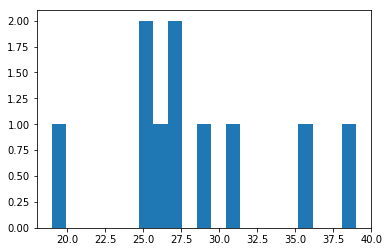

In [6]:
# Display the ages of the participants with a histogram. 
plt.hist(participants.age, bins = (participants.age.max() - participants.age.min() + 1));

10 subjects is a relatively small number, even for a neuroimaging study. For our analysis, this will be largely compensated by the quality of the data acquired for each subject. Nevertheless, we should keep in mind that our data includes only a **small sample of human subjects**, with a strong gender bias and different ages. 

### 3.2 Run overview

In the following cell, we display the block structure of the **eegfmriNF run** of our dataset. 

In [7]:
# Retrieve and display the events file for the eegfmriNF condition. 
events = pd.read_csv(data_path + 'task-eegfmriNF_events.tsv', sep = '\t')
events

,onset,duration,trial_type,stim_file
0,2,20,Rest,Rest_Xp1.png
1,22,20,Task-NF,Task-NF_Xp1.png
2,42,20,Rest,Rest_Xp1.png
3,62,20,Task-NF,Task-NF_Xp1.png
4,82,20,Rest,Rest_Xp1.png
5,102,20,Task-NF,Task-NF_Xp1.png
6,122,20,Rest,Rest_Xp1.png
7,142,20,Task-NF,Task-NF_Xp1.png
8,162,20,Rest,Rest_Xp1.png
9,182,20,Task-NF,Task-NF_Xp1.png


Onset and duration are in seconds. We can see that the structure is very simple, and consists of a succession of **rest blocks** and **task blocks**, each one lasting 20 seconds. 

## **4. Exploratory Data Analysis (EDA)**

### 4.1 Raw EEG data analysis

In the following cells, we load the **raw EEG data from our dataset**, and perform some exploratory analysis. In particular, we explore the data structure, show some examples of raw and filtered EEG signal, and take a look at a marker file. According to the article, the raw EEG data was sampled at 5 kHz, with FCz as the reference electrode and AFz as the ground electrode, and a resolution of 0.5 µV. 

In [8]:
# Install MNE as a pip package in the current Jupyter kernel. 
import sys
!{sys.executable} -m pip install mne

In [9]:
import mne

In [10]:
# Define an example subject. 
subject_index = subjects[0]

# Define the path of the header file (.vhdr) for this subject, for the eegfmriNF condition. 
vhdr_path = data_path + subject_index + '/eeg/' + subject_index + '_task-eegfmriNF_eeg.vhdr'

In [11]:
# Read the EEG header file. 
raw_object = mne.io.read_raw_brainvision(vhdr_path, preload = True)

Extracting parameters from ../ouroboros_eeg-fmri_nf_raw_data/sub-xp101/eeg/sub-xp101_task-eegfmriNF_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 2244399  =      0.000 ...   448.880 secs...


In [12]:
# Check the number of channels. 
len(raw_object.ch_names)

64

In [13]:
# Display the channel names. 
print(raw_object.ch_names)

['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'POz', 'ECG', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'FT9', 'FT10', 'Fpz', 'CPz']


Among these channels, the **C1 and C2 channels** have a particular importance, since the signal obtained at these positions is used to compute the EEG NF scores. Therefore, we retrieve the index of C1 and C2 channels in this list. 

In [14]:
# Identify the C1 channel index. 
c1_channel_index = raw_object.ch_names.index('C1')
c1_channel_index

34

In [15]:
# Identify the C2 channel index. 
c2_channel_index = raw_object.ch_names.index('C2')
c2_channel_index

35

In [16]:
# Display information about the EEG header file. 
raw_object.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2015-08-14 15:12:28 UTC
 nchan: 64
 projs: []
 sfreq: 5000.0 Hz
>

In [17]:
# Display the time points. 
raw_object.times

array([0.000000e+00, 2.000000e-04, 4.000000e-04, ..., 4.488794e+02,
       4.488796e+02, 4.488798e+02])

In [18]:
# Check the number of time points. 
raw_object.times.shape

(2244400,)

In [19]:
# Compute the number of unique time differences between two consecutive onsets. 
np.unique(raw_object.times[1:] - raw_object.times[:-1])

array([0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
       0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
       0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002])

We can guess that we have encountered a **floating point problem** when we used the NumPy function unique() on the difference between time points. In order to prevent this problem, we can round the results up to the 10th decimal, and use again the function unique(). 

In [20]:
# Compute the number of unique time differences between two consecutive onsets, rounding up to the 10th decimal. 
eeg_time_difference = np.unique(np.unique(raw_object.times[1:] - raw_object.times[:-1]).round(10))
eeg_time_difference

array([0.0002])

The time difference between two consecutive onsets, 0.0002 second, is consistent with the sampling frequency of 5000 Hz that we can see above, in the "Sampling frequency" attribute of the EEG header file. Now we can extract and look at the **raw EEG data**. 

In [21]:
# Export the EEG data into a NumPy array. 
eeg_raw_data = raw_object.get_data()
eeg_raw_data

array([[-4.6000e-05, -4.4500e-05, -4.5000e-05, ..., -1.5330e-03,
        -1.3890e-03, -1.1130e-03],
       [-7.3000e-05, -7.2500e-05, -7.1000e-05, ...,  1.0840e-03,
         1.2305e-03,  1.5020e-03],
       [-7.1000e-05, -7.0000e-05, -6.9500e-05, ..., -5.3300e-04,
        -4.1700e-04, -2.7800e-04],
       ...,
       [-9.4000e-05, -9.4500e-05, -9.4000e-05, ...,  1.4925e-03,
         9.0750e-04,  2.7050e-04],
       [-8.1500e-05, -8.1000e-05, -8.1000e-05, ..., -1.1675e-03,
        -1.1135e-03, -9.2950e-04],
       [-1.0000e-05, -1.0500e-05, -9.5000e-06, ...,  5.2300e-04,
         5.2850e-04,  4.7500e-04]])

In [22]:
# Check that this is indeed a NumPy array. 
type(eeg_raw_data)

numpy.ndarray

In [23]:
# Check the size of the array. 
eeg_raw_data.shape

(64, 2244400)

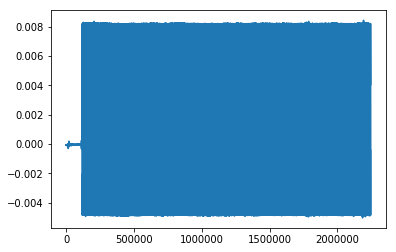

In [24]:
# Plot the data for the C1 channel. 
plt.plot(eeg_raw_data[c1_channel_index, :]);

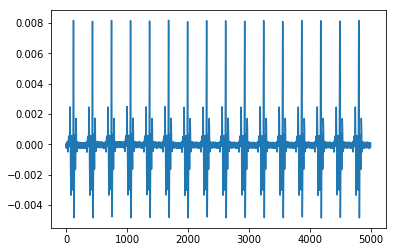

In [25]:
# Plot the data for the C1 channel, but only for a selection of 5000 samples. 
plt.plot(eeg_raw_data[c1_channel_index, 1000000:1005000]);

With these plots we can get an idea of the raw EEG data. We must remember that EEG acquisition inside an MRI scanner is technically difficult, and indeed, we can see that the signal appears to have a lot of noise. It is also possible to **filter the data** according to a certain EEG frequency band, for example the alpha band, defined as 8-12 Hz in the article but as 8-10 Hz in some other studies. 

In [26]:
# Filter data in order to obtain the alpha band. 
low_freq, high_freq = 8.0, 12.0 # Values in Hz. 
filtered_object = raw_object.filter(low_freq, high_freq, n_jobs = -1)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 8251 samples (1.650 sec)



[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=16)]: Done  62 out of  64 | elapsed:    8.3s remaining:    0.3s
[Parallel(n_jobs=16)]: Done  64 out of  64 | elapsed:    8.4s finished


In [27]:
# Check the type of the filtered object. 
type(filtered_object)

mne.io.brainvision.brainvision.RawBrainVision

In [28]:
# Export the EEG data into a NumPy array. 
eeg_filtered_data = filtered_object.get_data()
eeg_filtered_data

array([[ 0.00000000e+00,  8.68396091e-08,  1.73680938e-07, ...,
         8.32873987e-06,  4.16635449e-06,  4.23516474e-21],
       [-1.18584613e-20,  9.81173107e-08,  1.96241988e-07, ...,
         7.12676484e-06,  3.56512716e-06, -8.51268112e-20],
       [ 4.65868121e-21,  9.57191825e-08,  1.91417839e-07, ...,
         1.33668378e-06,  6.69846898e-07,  1.74171150e-20],
       ...,
       [ 8.47032947e-22,  3.02289734e-07,  6.04548465e-07, ...,
        -4.24521437e-06, -2.12544968e-06, -2.96461532e-21],
       [ 3.38813179e-21,  9.54614199e-08,  1.90943629e-07, ...,
         6.88043250e-06,  3.44077840e-06,  3.30342849e-20],
       [ 5.92923063e-21,  1.62423386e-07,  3.24809841e-07, ...,
        -4.71220039e-06, -2.35680477e-06,  6.98802181e-21]])

In [29]:
# Check that this is indeed a NumPy array. 
type(eeg_filtered_data)

numpy.ndarray

In [30]:
# Check the size of the array. 
eeg_filtered_data.shape

(64, 2244400)

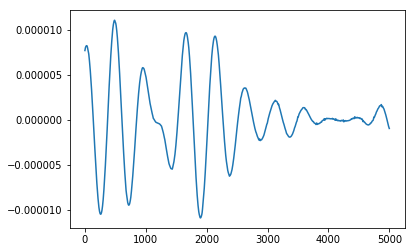

In [31]:
# Plot the data for the C1 channel, but only for a selection of 5000 samples. 
plt.plot(eeg_filtered_data[c1_channel_index, 1000000:1005000]);

Now we can take a look at the marker file, where a series of annotations indicate the experimental events associated to a particular onset. 

In [32]:
# Define the path of the marker file (.vmrk) for this subject, for the eegfmriNF condition. 
vmrk_path = data_path + subject_index + '/eeg/' + subject_index + '_task-eegfmriNF_eeg.vmrk'

# Read the marker file. 
annotation_object = mne.read_annotations(vmrk_path)

Finding 'sfreq' from header file: /Users/maeldonoso/M8_Programming/Ouroboros_EEG-fMRI_NF/ouroboros_eeg-fmri_nf_raw_data/sub-xp101/eeg/sub-xp101_task-eegfmriNF_eeg.vhdr


In [33]:
# Create a Pandas DataFrame to store the data from the Annotation object. 
annotations = pd.DataFrame(columns = ['onset', 'duration', 'description'])
annotations['onset'] = annotation_object.onset
annotations['duration'] = annotation_object.duration
annotations['description'] = annotation_object.description

# Display the DataFrame. 
annotations.head(10)

,onset,duration,description
0,0.0000,0.0002,New Segment/
1,29.9608,0.0002,Response/R128
2,31.9608,0.0002,Response/R128
3,32.7032,0.0002,Stimulus/S 99
4,33.9608,0.0002,Response/R128
5,35.9608,0.0002,Response/R128
6,37.9608,0.0002,Response/R128
7,39.9608,0.0002,Response/R128
8,41.9608,0.0002,Response/R128
9,43.9608,0.0002,Response/R128


In [34]:
# Display the description types. 
annotations.description.unique()

array(['New Segment/', 'Response/R128', 'Stimulus/S 99', 'Stimulus/S  2'],
      dtype=object)

From the article, we learn that Stimulus/S 99 is the protocol marker indicating the start of a **rest block**, while Stimulus/S 2 is the protocol marker indicating the start of a **task block**. Response/R 128 is the fMRI volume marker to correct for the gradient artefact in the MRI scanner. 

### 4.2 Preprocessed EEG data analysis

In the following cells, we load the **preprocessed EEG data from our dataset**, and perform some exploratory analysis. In particular, we show some examples of preprocessed EEG signal, and apply again some filtering. The preprocessing of the raw EEG data involved several steps, performed using BrainVision Analyzer II Software, and one of these steps is a downsampling with factor 25, to a 200 Hz frequency. Therefore, our preprocessed EEG data will have fewer data points than our raw EEG data. 

In [35]:
# Define an example subject. 
subject_index = subjects[0]

# Define the path of the header file (.vhdr) for this subject, for the eegfmriNF condition. 
vhdr_path = data_path + 'derivatives/' + subject_index + '/eeg_pp/' + subject_index + '_task-eegfmriNF_eeg_pp.vhdr'

In [36]:
# Read the EEG header file. 
preprocessed_object = mne.io.read_raw_brainvision(vhdr_path, preload = True)

Extracting parameters from ../ouroboros_eeg-fmri_nf_raw_data/derivatives/sub-xp101/eeg_pp/sub-xp101_task-eegfmriNF_eeg_pp.vhdr...
Setting channel info structure...
Reading 0 ... 80199  =      0.000 ...   400.995 secs...


<ipython-input-36-2fab29e93f6f>:2: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  preprocessed_object = mne.io.read_raw_brainvision(vhdr_path, preload = True)


In [37]:
# Export the EEG data into a NumPy array. 
eeg_preprocessed_data = preprocessed_object.get_data()
eeg_preprocessed_data

array([[-2.24100006e-04, -2.30300003e-04, -2.32900009e-04, ...,
        -7.44299988e-04, -7.41400024e-04, -7.40400024e-04],
       [-1.18000000e-04, -1.21500000e-04, -1.25300003e-04, ...,
        -5.90900024e-04, -5.84500000e-04, -5.82299988e-04],
       [-1.05300003e-04, -1.10800003e-04, -1.11200005e-04, ...,
        -1.06700005e-04, -1.05400002e-04, -1.03599998e-04],
       ...,
       [-2.31000004e-05, -2.07000008e-05, -2.35000000e-05, ...,
        -1.27900002e-04, -1.31800003e-04, -1.35500000e-04],
       [-4.67000008e-05, -4.81000023e-05, -4.92999992e-05, ...,
        -6.09000015e-05, -6.26000023e-05, -6.50999985e-05],
       [-2.46000004e-05, -2.73000011e-05, -3.03000011e-05, ...,
        -1.97000008e-05, -1.87000008e-05, -1.72000008e-05]])

In [38]:
# Check the size of the array. 
eeg_preprocessed_data.shape

(64, 80200)

In [39]:
# Compute the expected size of the raw EEG array after a downsampling with factor 25. 
eeg_raw_data.shape[1] / 25

89776.0

The new size of our data is close, but not identical, to what we would have expected considering a downsampling with factor 25. We can guess that the difference is due to the other preprocessing steps mentioned in the article. 

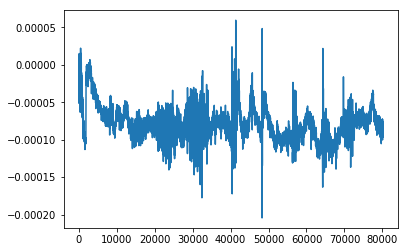

In [40]:
# Plot the data for the C1 channel. 
plt.plot(eeg_preprocessed_data[c1_channel_index, :]);

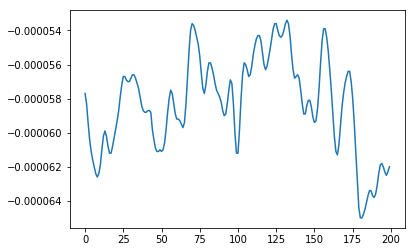

In [41]:
# Plot the data for the C1 channel, but only for a selection of 200 samples. 
plt.plot(eeg_preprocessed_data[c1_channel_index, 10000:10200]);

The preprocessed EEG signal looks **very different from the raw EEG signal**. In the second graph, we show a selection of 200 samples, in contrast to the 5000 samples that we showed for the raw EEG, to account for the downsampling with a factor 25. 

In [42]:
# Define downsampling frequency, in Hz. 
downsampling_frequency = 200

# Compute the total length in seconds. 
eeg_preprocessed_data.shape[1] / downsampling_frequency

401.0

In [43]:
# Check the last onset and duration from the events file. 
events.tail(1)

,onset,duration,trial_type,stim_file
19,382,20,Task-NF,Task-NF_Xp1.png


The total length in seconds seems essentially consistent with the one we obtain from the events file. Now, we can try again to **filter the data** according to a certain EEG frequency band, for example the alpha band, defined as 8-12 Hz in the article. 

In [44]:
# Filter data in order to obtain the alpha band. 
low_freq, high_freq = 8.0, 12.0 # Values in Hz. 
filtered_object = preprocessed_object.filter(low_freq, high_freq, n_jobs = -1)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 331 samples (1.655 sec)



[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  48 out of  63 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  61 out of  63 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  63 out of  63 | elapsed:    0.2s finished


In [45]:
# Export the EEG data into a NumPy array. 
eeg_filtered_data = filtered_object.get_data()

# Check the size of the array. 
eeg_filtered_data.shape

(64, 80200)

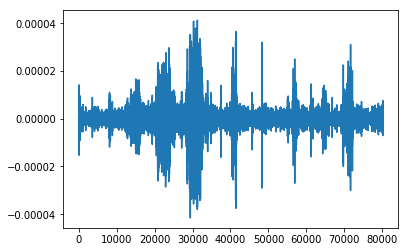

In [46]:
# Plot the data for the C1 channel. 
plt.plot(eeg_filtered_data[c1_channel_index, :]);

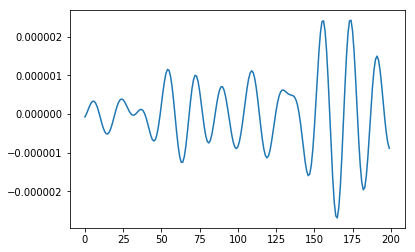

In [47]:
# Plot the data for the C1 channel, but only for a selection of 200 samples. 
plt.plot(eeg_filtered_data[c1_channel_index, 10000:10200]);

In the second graph, we count approximately 12 cycles for 200 samples, corresponding to 12 cycles per second, or 12 Hz. This is consistent with the highest frequency of the alpha band, that we defined as 8-12 Hz. 

### 4.3 Preprocessed EEG bandpowers

A common step in EEG research is to compute the **bandpower of a given frequency band**, which summarizes the contribution of this frequency band to the overall power of the signal. In a very complete and interesting tutorial (https://raphaelvallat.com/bandpower.html), Raphael Vallat proposes a Python function to compute the bandpower, and suggests that this measure could be particularly useful in machine learning. Indeed, we will have to extract relevant features from our preprocessed EEG data, and the bandpowers of the major frequency bands are natural candidates. In the following cells, we will use the proposed Python function as a building block to **compute the bandpowers of our preprocessed EEG data**, therefore using a methodology close, but not identical, to the one described by the authors of the dataset. 

In [48]:
from scipy.signal import welch
from scipy.integrate import simps

In [49]:
# Define a function to compute the average power of the signal in a given frequency band.
# This function was proposed in Raphael Vallat's tutorial: https://raphaelvallat.com/bandpower.html. 
def bandpower(data, sf, band, window_sec=None, relative=False):
    """Compute the average power of the signal x in a specific frequency band.

    Parameters
    ----------
    data : 1d-array
        Input signal in the time-domain.
    sf : float
        Sampling frequency of the data.
    band : list
        Lower and upper frequencies of the band of interest.
    window_sec : float
        Length of each window in seconds.
        If None, window_sec = (1 / min(band)) * 2
    relative : boolean
        If True, return the relative power (= divided by the total power of the signal).
        If False (default), return the absolute power.

    Return
    ------
    bp : float
        Absolute or relative band power.
    """
    
    band = np.asarray(band)
    low, high = band

    # Define window length
    if window_sec is not None:
        nperseg = window_sec * sf
    else:
        nperseg = (2 / low) * sf

    # Compute the modified periodogram (Welch)
    freqs, psd = welch(data, sf, nperseg=nperseg)
    
    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)
    return bp

First, we will apply this function to the alpha band (8-12 Hz), using only the first 2 seconds of the data. We will also define a window length of 2 seconds when applying the Welch's method. 

In [50]:
# Define the preprocessed EEG data sampling frequency. 
sampling_frequency = float(200)

In [51]:
# Compute the alpha bandpower for the first 2 seconds. 
data_bandpower = bandpower(eeg_preprocessed_data[c1_channel_index, 0:400], sampling_frequency, [8, 12], window_sec = 2, relative = True)
data_bandpower

0.05680203369225457

Now we will apply the same method for all the major frequency bands: **delta (1-4 Hz), theta (4-8 Hz), alpha (8-12 Hz), beta (12-30 Hz) and high beta (30-50 Hz)**, using only the first 2 seconds of the data. 

In [52]:
# For the first 2 seconds, compute the bandpower for all frequencies. 
bandpower_for_all_frequencies = []

# Iterate through all frequencies. 
for frequency_band in [[1, 4], [4, 8], [8, 12], [12, 30], [30, 50]]:
    
    # Compute the bandpower. 
    data_bandpower = bandpower(eeg_preprocessed_data[c1_channel_index, 0:400], 
                               sampling_frequency, 
                               [frequency_band[0], frequency_band[1]], 
                               window_sec = 2, 
                               relative = True)
    
    # Append to the list. 
    bandpower_for_all_frequencies.append(data_bandpower)

# Display the bandpowers for all frequencies. 
bandpower_for_all_frequencies

[0.11243391226765903,
 0.02806983487745213,
 0.05680203369225457,
 0.48153306092260656,
 0.08578713305929944]

In [53]:
# Compute the sum of the bandpowers for all frequencies. 
np.sum(bandpower_for_all_frequencies)

0.7646259748192716

As we can see, the sum is not equal to one. Since we have chosen to compute the bandpower on a sequence of 2 seconds, it should be difficult to take into account the **very low frequency bands**. In Raphael Vallat's tutorial, we read: "How do we define the optimal window duration then? A commonly used approach is to take a window sufficiently long to encompasses at least two full cycles of the lowest frequency of interest. In our case, our lowest frequency of interest is 0.5 Hz so we will choose a window of 2/0.5=4 seconds." In our case, the lowest frequency of interest is 1 Hz, therefore it is reasonable to choose a 2 / 1 = 2 seconds window. As a security check, we will look at what happens if we explore lower frequencies while taking a longer window of 4 seconds, applied on the first 4 seconds of our preprocessed EEG data. Specifically, we will extend the delta band to 0.5-4 Hz, instead of 1-4 Hz. 

In [54]:
# For the first 4 seconds, compute the bandpower for all frequencies. 
bandpower_for_all_frequencies = []

# Iterate through all frequencies. 
for frequency_band in [[0.5, 4], [4, 8], [8, 12], [12, 30], [30, 50]]:
    
    # Compute the bandpower. 
    data_bandpower = bandpower(eeg_preprocessed_data[c1_channel_index, 0:800], 
                               sampling_frequency, 
                               [frequency_band[0], frequency_band[1]], 
                               window_sec = 4, 
                               relative = True)
    
    # Append to the list. 
    bandpower_for_all_frequencies.append(data_bandpower)

# Display the bandpowers for all frequencies. 
bandpower_for_all_frequencies

[0.520292421165258,
 0.028167825690350402,
 0.02883396902039374,
 0.2568960346378461,
 0.04969078768996292]

In [55]:
# Compute the sum of the bandpowers for all frequencies. 
np.sum(bandpower_for_all_frequencies)

0.883881038203811

As expected, when a larger frequency range is taken into account, the sum becomes closer to one. According to the article, the bandpower used to compute the EEG NF scores was estimated by applying a **2 second Hamming window**, and using a periodogram in the 8–12 Hz range at C1 and C2 during the NF task, normalized by the power during rest. Since the authors used the Hamming window instead of the Welch's method, our methodology is different from theirs, and we should not expect to obtain the same results if we try to compute the EEG NF scores ourselves. Nevertheless, our primary objective is not to replicate the NF scores, but to extract relevant features from our preprocessed EEG data, in order to use them in our machine learning models. 

A key point is that **we need to sample our bandpowers differently for different objectives**. If we plan to use these bandpowers to predict the fMRI BOLD signal or the fMRI NF scores, we should use a 2 seconds sampling, because one fMRI image was acquired every 2 seconds. Conversely, if our objective is to use these bandpowers to predict the EEG NF scores, we should use a 0.25 second sampling, because the EEG NF score was updated every 0.25 second. Therefore, we need to define a function that allows for different sampling, or time step, of the bandpowers for our frequency bands of interest. 

In [56]:
# Define a function to compute all bandpowers for all frequency bands, allowing for different sampling or time step. 
# The nb_samples_x variables refer to the number of data points of the eeg_preprocessed_data array. 
# The time window, in seconds, corresponds to the length of the EEG data used to compute each bandpower point. 
# The time step, in seconds, corresponds to the length of the step for moving the window at each iteration. 
def compute_all_bandpowers(eeg_preprocessed_data, channel_index, time_window, time_step, sampling_frequency, frequency_bands = [[1, 4], [4, 8], [8, 12], [12, 30], [30, 50]]):
    
    # Compute the number of samples per time window and time step. 
    nb_samples_per_time_window = int(time_window * sampling_frequency)
    nb_samples_per_time_step = int(time_step * sampling_frequency)
    nb_time_steps = int(eeg_preprocessed_data.shape[1] / nb_samples_per_time_step)
    
    # Create a NumPy array. 
    all_bandpowers = np.zeros((nb_time_steps, len(frequency_bands)))
    
    # Iterate through all the onsets according to the number of time steps. 
    for onset_index in range(nb_time_steps):
        
        # Compute the window indexes, excluding indexes under zero or over the length of the eeg_preprocessed_data array. 
        window_indexes = np.array(range((nb_samples_per_time_step * onset_index) - int(nb_samples_per_time_window / 2), 
                                        (nb_samples_per_time_step * onset_index) + int(nb_samples_per_time_window / 2)))
        out_of_range_indexes = (window_indexes < 0) + (window_indexes >= eeg_preprocessed_data.shape[1])
        window_indexes = window_indexes[~out_of_range_indexes]

        # Iterate through all the frequency bands. 
        for frequency_band_index in range(len(frequency_bands)):
            
            # Compute the bandpower for this time window and this frequency band. 
            data_bandpower = bandpower(eeg_preprocessed_data[channel_index, window_indexes], 
                                       sampling_frequency, 
                                       [frequency_bands[frequency_band_index][0], frequency_bands[frequency_band_index][1]], 
                                       window_sec = time_window, 
                                       relative = True)
            
            # Store the result in the NumPy array. 
            all_bandpowers[onset_index, frequency_band_index] = data_bandpower
            
    # Return the NumPy array. 
    return all_bandpowers

First, we will compute the bandpowers with a time step of **0.25 second**. 

In [57]:
# Compute all bandpowers. 
all_bandpowers = compute_all_bandpowers(eeg_preprocessed_data, c1_channel_index, 2, 0.25, sampling_frequency)
all_bandpowers = all_bandpowers[2:-2, :] # Remove the two first and two last data points, corresponding to incomplete windows. 
all_bandpowers.shape

/Users/maeldonoso/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/scipy/signal/spectral.py:1970: UserWarning: nperseg = 400 is greater than input length  = 200, using nperseg = 200
  .format(nperseg, input_length))
/Users/maeldonoso/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/scipy/signal/spectral.py:1970: UserWarning: nperseg = 400 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/Users/maeldonoso/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/scipy/signal/spectral.py:1970: UserWarning: nperseg = 400 is greater than input length  = 300, using nperseg = 300
  .format(nperseg, input_length))
/Users/maeldonoso/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/scipy/signal/spectral.py:1970: UserWarning: nperseg = 400 is greater than input length  = 350, using nperseg = 350
  .format(nperseg, input_length))


(1600, 5)

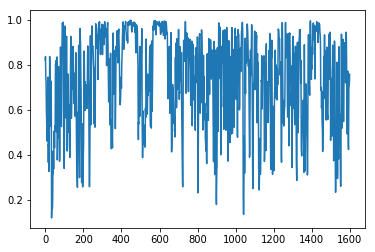

In [58]:
# Plot the sum of all bandpowers for every time step. 
plt.plot(all_bandpowers.sum(axis = 1));

In [59]:
# Take the sum of all bandpowers for every time step, and compute the mean. 
all_bandpowers.sum(axis = 1).mean()

0.7291192712699458

Again, the sum is not equal to one, for the reasons discussed above. 

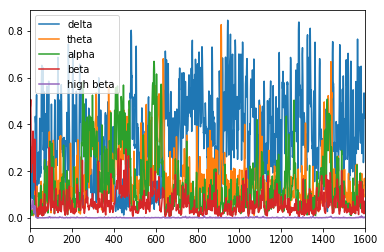

In [60]:
# Display the relative bandpowers of all the frequency bands. 
all_bandpowers_1600_samples = all_bandpowers
pd.DataFrame(all_bandpowers_1600_samples, columns = ['delta', 'theta', 'alpha', 'beta', 'high beta']).plot();

Now, we will compute the bandpowers with a time step of **2 seconds**. 

In [61]:
# Compute all bandpowers. 
all_bandpowers = compute_all_bandpowers(eeg_preprocessed_data, c1_channel_index, 2, 2, sampling_frequency)
all_bandpowers.shape

(200, 5)

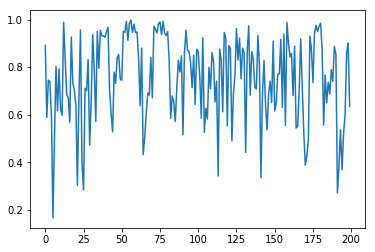

In [62]:
# Plot the sum of all bandpowers for every time step. 
plt.plot(all_bandpowers.sum(axis = 1));

In [63]:
# Take the sum of all bandpowers for every time step, and compute the mean. 
all_bandpowers.sum(axis = 1).mean()

0.7529403911205722

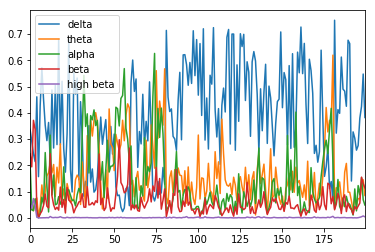

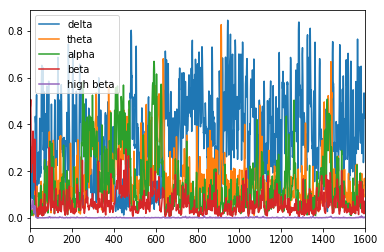

In [64]:
# Display the relative bandpowers of all the frequency bands, and compare with the previous sampling. 
all_bandpowers_200_samples = all_bandpowers
pd.DataFrame(all_bandpowers_200_samples, columns = ['delta', 'theta', 'alpha', 'beta', 'high beta']).plot()
pd.DataFrame(all_bandpowers_1600_samples, columns = ['delta', 'theta', 'alpha', 'beta', 'high beta']).plot();

As expected, we obtain **similar patterns for the two different samplings**, defined respectively by the time steps of 0.25 second and 2 seconds. This will allow us to sample our bandpowers differently for different machine learning objectives. 

### 4.4 EEG NF scores analysis

In the following cells, we load the **EEG NF scores from our dataset**, and perform some exploratory analysis. In particular, we try to understand the data structure, and see to what extent we might be able to replicate the NF scores directly from the preprocessed EEG data. 

In [65]:
import h5py

In [66]:
# Define an example subject. 
subject_index = subjects[0]

# Define the path of the .mat file for this subject, for the eegfmriNF condition. 
mat_path = data_path + 'derivatives/' + subject_index + '/NF_eeg/d_' + subject_index + '_task-eegfmriNF_NFeeg_scores.mat'

In [67]:
# Load the .mat file. 
f = h5py.File(mat_path, 'r')
f.keys()

<KeysViewHDF5 ['#refs#', 'NF_eeg']>

In [68]:
# Extract the data from the .mat file. 
mat_data = f.get('NF_eeg')
mat_data.keys()

<KeysViewHDF5 ['eegdata', 'filtpower_left', 'filtpower_right', 'method', 'nf', 'nf_laterality', 'smoothnf']>

Now we can explore the different arrays associated to the EEG NF scores. 

In [69]:
# 64 x 200 x 400 array containing the preprocessed EEG signal. 
mat_eegdata = np.array(mat_data['eegdata'])

# Alpha bandpower of the filtered EEG signal in C1. 
mat_filtpower_left = np.array(mat_data['filtpower_left'])

# Alpha bandpower of the filtered EEG signal in C2. 
mat_filtpower_right = np.array(mat_data['filtpower_right'])

# Vector of NF scores for comparison with XP2. 
mat_nf = np.array(mat_data['nf'])

# NF scores. 
mat_nf_laterality = np.array(mat_data['nf_laterality'])

# Smoothed vector of NF scores for comparison with XP2. 
mat_smoothnf = np.array(mat_data['smoothnf'])

In [70]:
# Display the shapes of the arrays. 
print('mat_eegdata:', mat_eegdata.shape)
print('mat_filtpower_left:', mat_filtpower_left.shape)
print('mat_filtpower_right:', mat_filtpower_right.shape)
print('mat_nf:', mat_nf.shape)
print('mat_nf_laterality:', mat_nf_laterality.shape)
print('mat_smoothnf:', mat_smoothnf.shape)

mat_eegdata: (400, 200, 64)
mat_filtpower_left: (1600, 1)
mat_filtpower_right: (1600, 1)
mat_nf: (1600, 1)
mat_nf_laterality: (1600, 1)
mat_smoothnf: (1600, 1)


The mat_filtpower_left and mat_filtpower_right arrays correspond to the alpha bandpower of the filtered EEG signal in C1 and C2. The mat_nf and mat_smoothnf arrays were computed for comparison with the second experiment (XP2). The **mat_nf_laterality** array corresponds to the ordinate, updated every 0.25 second, of the ball shown to the subject as the feedback. 

The **mat_eegdata** array has three dimensions, and is more complicated to understand. The third dimension corresponds most probably to the EEG channels, but what about the two first dimensions? The article does not provide much information, but it is reasonable to assume that the first dimension corresponds to the 400 seconds of the run, and the second dimension to the 200 samples per second. We verify this by plotting the flattened data from the array. 

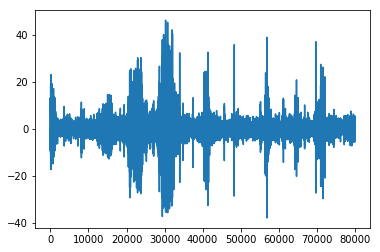

In [71]:
# Plot the flattened data from the mat_eegdata array, for the C1 channel. 
plt.plot(mat_eegdata[:, :, c1_channel_index].flatten());

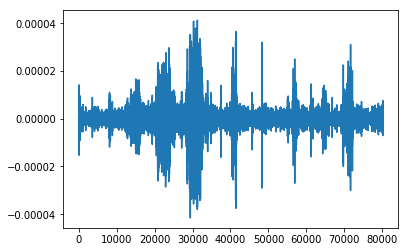

In [72]:
# Plot again the filtered data for the C1 channel, for comparison. 
plt.plot(eeg_filtered_data[c1_channel_index, :]);

It seems that our interpretation was correct. While their value range is quite different, the two graphs have a very similar overall shape. We must remember that our eeg_filtered_data array was obtained after filtering for the **alpha band (8-12 Hz)**, and that the same band was used in the study to compute the EEG NF scores. Nevertheless, our 8-12 Hz filter may be different from the one the authors used, and that can explain the differences between the two graphs. 

In [73]:
# Display the keys of the mat_data object. 
mat_data['method'].keys()

<KeysViewHDF5 ['freq_band_nf', 'freq_band_nf_laterality', 'lapC3_filter']>

In [74]:
# Display the EEG frequency band. 
np.array(mat_data['method']['freq_band_nf_laterality'])

array([[ 8.],
       [12.]])

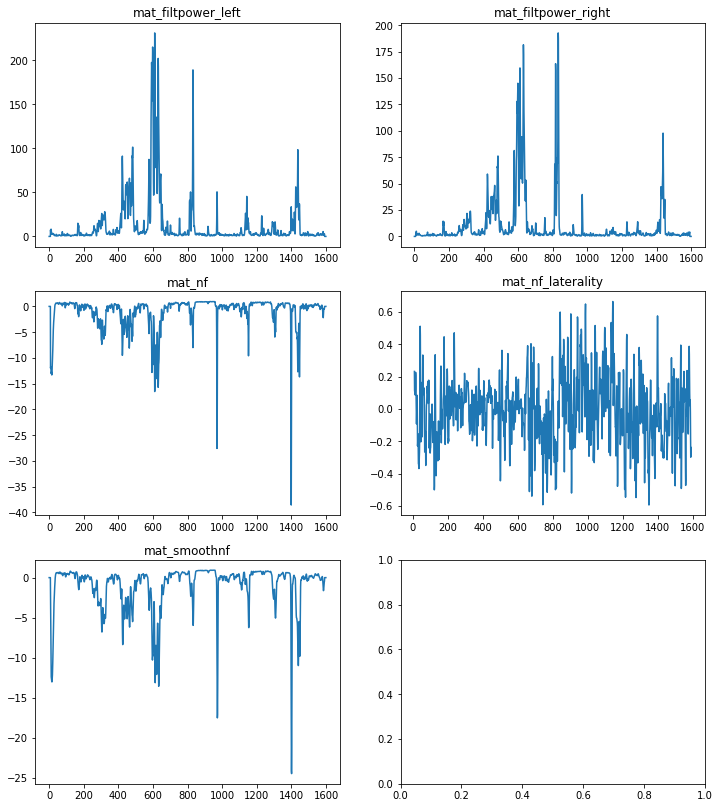

In [75]:
# Display the different NF scores variables. 
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 14))
axes[0, 0].plot(mat_filtpower_left)
axes[0, 0].set_title('mat_filtpower_left')
axes[0, 1].plot(mat_filtpower_right)
axes[0, 1].set_title('mat_filtpower_right')
axes[1, 0].plot(mat_nf)
axes[1, 0].set_title('mat_nf')
axes[1, 1].plot(mat_nf_laterality)
axes[1, 1].set_title('mat_nf_laterality')
axes[2, 0].plot(mat_smoothnf)
axes[2, 0].set_title('mat_smoothnf');

Now, **could we compute the EEG NF scores ourselves**? As we mentioned earlier, according to the article, the bandpower used to compute the EEG NF scores was estimated by applying a 2 second Hamming window, and using a periodogram in the 8–12 Hz range at C1 and C2 during the NF task, normalized by the power during rest. Since the authors used the Hamming window instead of the Welch's method, our methodology is different from theirs, and we should not expect to obtain the same results. Moreover, it is not very clear how we should use the power during the rest blocks to normalize the bandpowers during the task blocks. Considering these limitations, it is **quite unlikely that we would be able to replicate the EEG NF scores**, but we could make a rough experiment, skipping the normalization step based on the rest blocks. 

In [76]:
# Compute the bandpowers corresponding to the alpha band (8-12 Hz) for C1 and C2 electrodes. 
bandpower_c1_alpha = compute_all_bandpowers(eeg_preprocessed_data, c1_channel_index, 2, 0.25, sampling_frequency)
bandpower_c1_alpha = bandpower_c1_alpha[2:-2, 2]
bandpower_c2_alpha = compute_all_bandpowers(eeg_preprocessed_data, c2_channel_index, 2, 0.25, sampling_frequency)
bandpower_c2_alpha = bandpower_c2_alpha[2:-2, 2]

# Compute the EEG NF scores, or motor imagery desynchronization laterality, according to the formula in the article. 
neurofeedback_score = (bandpower_c1_alpha - bandpower_c2_alpha) / (bandpower_c1_alpha + bandpower_c2_alpha)

# Display the shape of the approximated EEG NF scores array. 
neurofeedback_score.shape

(1600,)

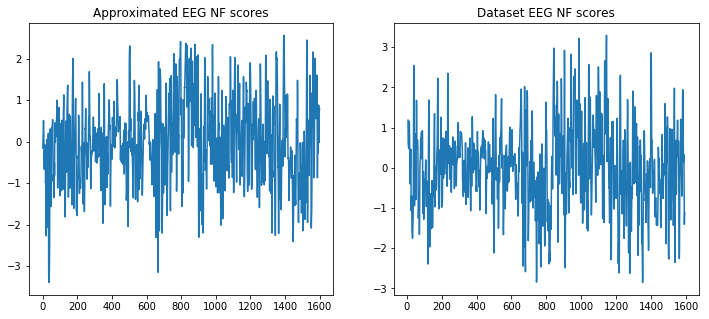

In [77]:
# After normalization, display the approximated EEG NF scores, and compare them to the EEG NF scores from the dataset. 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
axes[0].plot((neurofeedback_score - np.mean(neurofeedback_score)) / np.std(neurofeedback_score))
axes[0].set_title('Approximated EEG NF scores')
axes[1].plot((mat_nf_laterality - np.nanmean(mat_nf_laterality)) / np.nanstd(mat_nf_laterality))
axes[1].set_title('Dataset EEG NF scores');

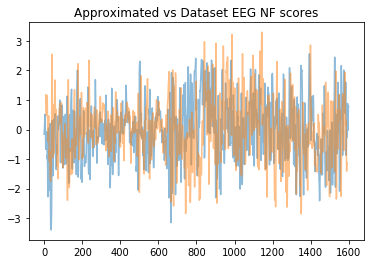

In [78]:
# Display the approximated EEG NF scores and the EEG NF scores from the dataset on the same graph. 
plt.figure()
plt.plot((neurofeedback_score - np.mean(neurofeedback_score)) / np.std(neurofeedback_score), alpha = 0.5)
plt.plot((mat_nf_laterality - np.nanmean(mat_nf_laterality)) / np.nanstd(mat_nf_laterality), alpha = 0.5)
plt.title('Approximated vs Dataset EEG NF scores');

As expected, **the overlap between the two graphs is not convincing**. Replicating the EEG NF scores without using the exact same methodology appears to be difficult. Fortunately, this will not be necessary for this project, since we will simply use the NF scores provided in the dataset. 

### 4.5 fMRI data analysis

In the following cells, we load the **fMRI data from our dataset**, and perform some exploratory analysis. In particular, we explore the data structure, show some examples of brain images and their value distribution, observe the differences between two images, and compare the images from the different subjects and the different runs. According to the article, the scanner began the Echo-Planar Imaging (EPI) pulse sequence 2 seconds prior to the start of the protocol (i.e. the first rest block), so the first Repetition Time (TR) of 2 seconds should be discarded. This is consistent with the events file, where the first onset is indeed at 2 seconds. 

In [79]:
# Define an example subject. 
subject_index = subjects[0]

In [80]:
# Install NiBabel as a pip package in the current Jupyter kernel. 
import sys
!{sys.executable} -m pip install nibabel

In [81]:
import nibabel as nib

In [82]:
# Load a NIFTI image using the NiBabel library, and display its size. 
img = nib.load(data_path + subject_index + '/func/' +  subject_index + '_task-eegfmriNF_bold.nii.gz')
img.shape

(106, 106, 32, 210)

In [83]:
# Extract the image data, and display its size. 
image_data = img.get_fdata()
image_data.shape

(106, 106, 32, 210)

In [84]:
# Display the number of scans. 
nb_scans = image_data.shape[3]
nb_scans

210

In [85]:
# Check that the image data is a NumPy array. 
type(image_data) == np.ndarray

True

In [86]:
# Check that the image data is in float64 format. 
image_data.dtype == np.dtype(np.float64)

True

In [87]:
# Display the total number of values for one 3D volume. 
np.prod(image_data[:, :, :, 0].shape)

359552

In [88]:
# Display the memory usage. 
print('Image size:', str(image_data.nbytes), 'bytes')

Image size: 604047360 bytes


In [89]:
# Display the metadata of the image. 
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 57
dim             : [  4 106 106  32 210   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.        1.981132  1.981132  4.        2.        0.        0.
  0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : alternating increasing 2
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=23;Time=151829.950;phase=1'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.013484294
quatern_c       : -0.98967105
quatern_d       : -0.1426559

The metadata contains mostly information specific to the **fMRI preprocessing**. The attribute "dim" refers to the data dimensionality, starting with the number of dimensions (4), followed by the lengths of the three first dimensions (106, 106, 32) which are consistent with the size of the NumPy array, and by the fourth dimension which is the number of scans. A complete definition of the NIFTI header can be found here: https://nifti.nimh.nih.gov/pub/dist/src/niftilib/nifti1.h. 

In [90]:
# Define a function to return the middle sections of an image data array. 
def middle_sections(image_data):
    return tuple((np.array(image_data[:, :, :].shape) / 2).astype(int))

In [91]:
# Find the middle sections coordinates of the image data array. 
middle_coord = middle_sections(image_data[:, :, :, 0])
middle_coord

(53, 53, 16)

In [92]:
# Define a function to display sections of an image through the sagittal, coronal and axial views, using the middle sections coordinates. 
def display_fMRI_image(image_data, middle_coord, scan = 0):
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
    axes[0].imshow(image_data[middle_coord[0], :, :, scan].T, origin = 'lower')
    axes[0].set_title('Sagittal view')
    axes[1].imshow(image_data[:, middle_coord[1], :, scan].T, origin = 'lower')
    axes[1].set_title('Coronal view')
    axes[2].imshow(image_data[:, :, middle_coord[2], scan], origin = 'lower')
    axes[2].set_title('Axial view');

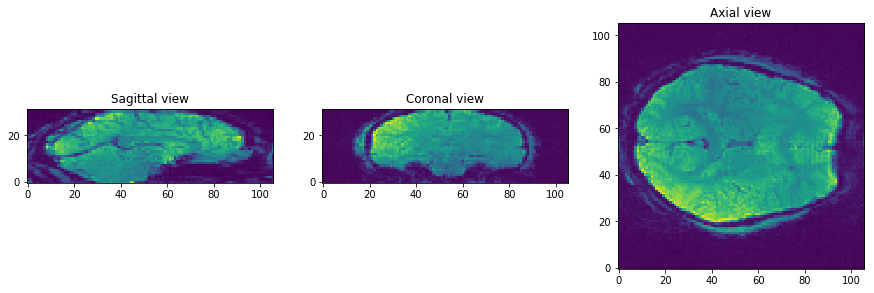

In [93]:
# Display sections of an image through the sagittal, coronal and axial views, using the middle sections coordinates. 
display_fMRI_image(image_data, middle_coord)

In this example image, displayed using the middle section of the sagittal, coronal and axial views, we can see that different brain regions show different activity patterns. We must remember that these are only 2D sections of a larger 3D image, and that each 3D image is just one scan inside a larger 4D array. We can already notice that by construction, **a large part of these values will be irrelevant for our analysis**. Indeed, each scan covers a cubic 3D space, inside which only the central voxels represent the brain of the subject. 

In [94]:
# Display the proportion of NaN values for all the scans. 
np.sum(np.isnan(image_data)) / np.prod(image_data.shape)

0.0

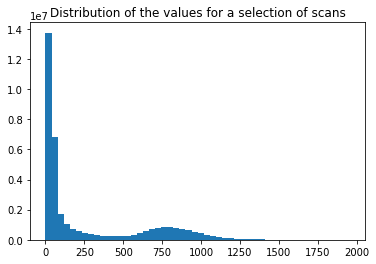

In [95]:
# Select randomly a certain number of scans. 
nb_selected_scans = 100
random_scans = np.random.randint(0, nb_scans, size = nb_selected_scans)

# Display an histogram of the values inside these scans. 
plt.hist(image_data[:, :, :, random_scans].flatten(), bins = 50)
plt.title('Distribution of the values for a selection of scans');

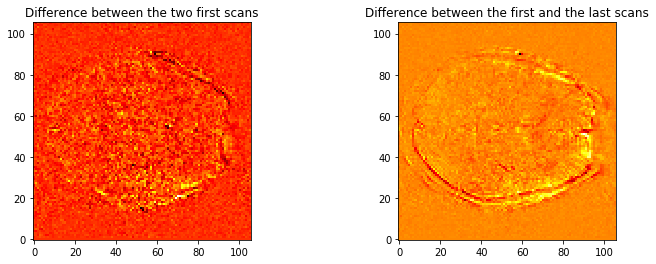

In [96]:
# Display the difference between the two first scans, and between the first and the last scans. 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
axes[0].imshow(image_data[:, :, middle_coord[2], 0] - image_data[:, :, middle_coord[2], 1], 
           origin = 'lower', cmap = plt.get_cmap('hot'))
axes[0].set_title('Difference between the two first scans')
axes[1].imshow(image_data[:, :, middle_coord[2], 0] - image_data[:, :, middle_coord[2], (nb_scans - 1)], 
           origin = 'lower', cmap = plt.get_cmap('hot'))
axes[1].set_title('Difference between the first and the last scans');

We can see that there are indeed **some differences between the scans**. The differences seem slightly bigger between the first and the last scan than between the two first scans. Now we can look at the brain images for all the subjects. 

Starting subject: sub-xp101
Starting subject: sub-xp102
Starting subject: sub-xp103
Starting subject: sub-xp104
Starting subject: sub-xp105
Starting subject: sub-xp106
Starting subject: sub-xp107
Starting subject: sub-xp108
Starting subject: sub-xp109
Starting subject: sub-xp110


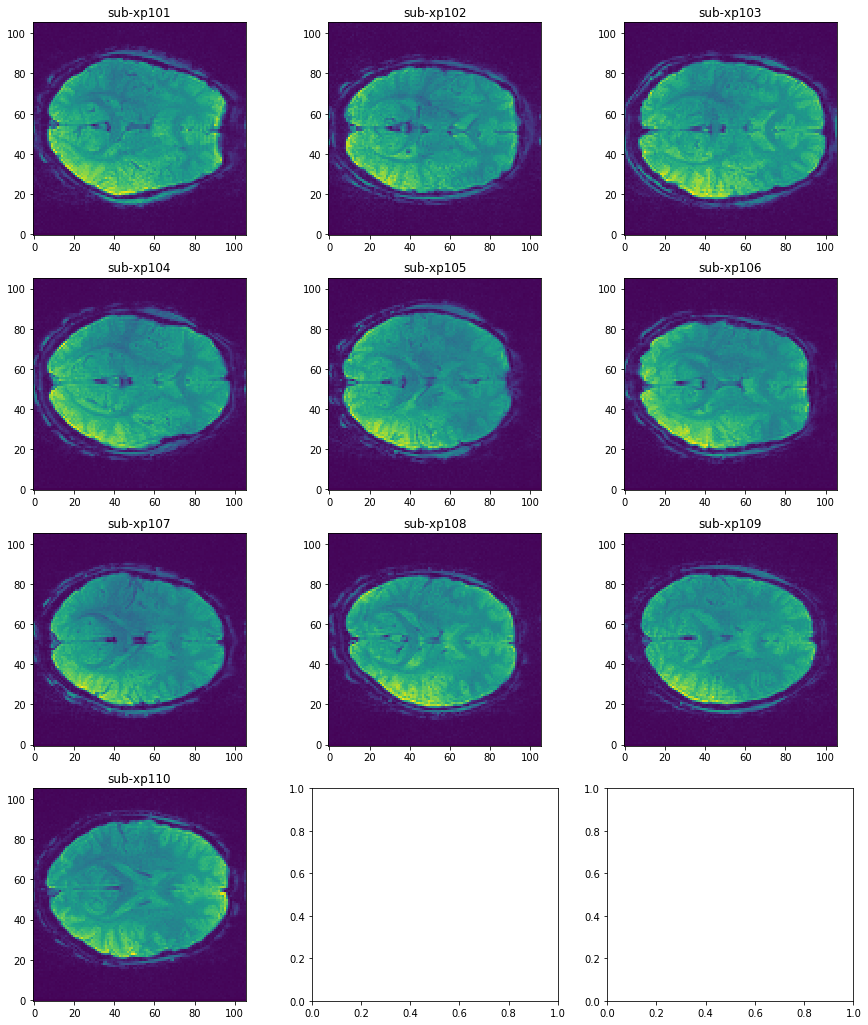

In [97]:
# Compare the 3D images between all subjects. 
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (15, 18))
counter = 0

# Iterate through all subjects. 
for subject_index in subjects:
    
    # Display current subject. 
    print('Starting subject: ' + subject_index)
    
    # Load a NIFTI image using the NiBabel library. 
    img = nib.load(data_path + subject_index + '/func/' +  subject_index + '_task-eegfmriNF_bold.nii.gz')
    
    # Extract the image data. 
    image_data = img.get_fdata()
    
    # Compute the row and column indexes. 
    row_index = counter // 3
    column_index = counter % 3
    
    # Display sections of an image through the axial view, using the middle sections coordinates. 
    axes[row_index, column_index].imshow(image_data[:, :, middle_coord[2], 0], origin = 'lower')
    axes[row_index, column_index].set_title(subject_index);
    
    # Increment. 
    counter += 1

If we were working with fMRI statistical maps, i.e. the maps obtained at a more advanced step in the fMRI analysis pipeline, the 3D images would not represent the brains of the different subjects in their true proportions, but rather a **normalized version using a standardized brain model, such as the Montreal Neurological Institute (MNI) template**. In other words, when we reach this more advanced step, the brain data of every subject is transformed into a standard space, in order to allow meaningful comparisons and statistics. The normalization process is not perfect, but as a corrective measure, the data is typically smoothed with a Gaussian kernel, as it is the case in this study. One key implication of the normalization is that a (xi, yi, zi) voxel from one subject and one condition is comparable to a (xi, yi, zi) voxel of another subject or another condition. In other words, thanks to the normalization, the 3D images can be compared elementwise between several subjects or conditions. 

In contrast, our dataset contains only the BOLD (Blood Oxygen Level Dependent) 3D images, i.e. the raw data before the normalization step. In the images above, we can see that **our brain images are not yet normalized into a common template**. Therefore, in our case, **the elementwise comparison between subjects is not possible**, since the voxel positions are not comparable. This limitation has important implications for our machine learning models. Since the brains in our fMRI dataset exist in different features spaces, **pooling the data from several subjects and running a regression model on the pooled dataset would not be possible without additional normalization steps**, which are outside the scope of this project. This is not a problem for us, since we are primarily interested in predicting EEG activity, fMRI activity and NF scores, and this can be done at the level of a single subject. But this limitation sheds light on the importance of normalization for machine learning projects using fMRI data. 

We can also take a look at the brain images for the different NF runs of the experiment. 

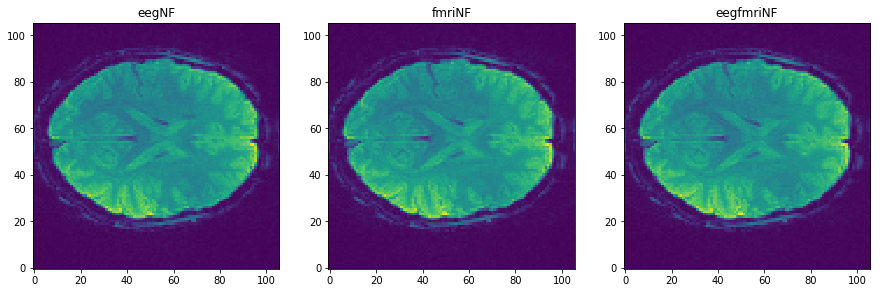

In [98]:
# Compare the 3D images for the same subject between all NF runs. 
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 18))
counter = 0

# Iterate through all NF runs. 
for condition in ['eegNF', 'fmriNF', 'eegfmriNF']:
    
    # Load a NIFTI image using the NiBabel library. 
    img = nib.load(data_path + subject_index + '/func/' +  subject_index + '_task-' + condition + '_bold.nii.gz')
    
    # Extract the image data. 
    image_data = img.get_fdata()
    
    # Display sections of an image through the axial view, using the middle sections coordinates. 
    axes[counter].imshow(image_data[:, :, middle_coord[2], 0], origin = 'lower')
    axes[counter].set_title(condition);
    
    # Increment. 
    counter += 1

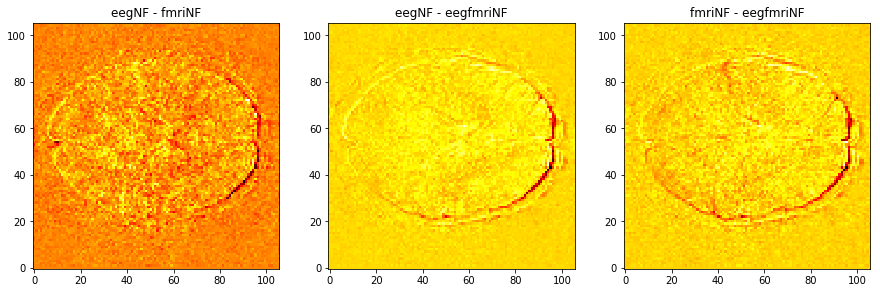

In [99]:
# Compute the contrasts between NF runs for the same subject. 
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 18))
counter = 0

# Iterate through all contrasts. 
for contrast in [['eegNF', 'fmriNF'], ['eegNF', 'eegfmriNF'], ['fmriNF', 'eegfmriNF']]:
    
    # Load the NIFTI images using the NiBabel library. 
    img_1 = nib.load(data_path + subject_index + '/func/' +  subject_index + '_task-' + contrast[0] + '_bold.nii.gz')
    img_2 = nib.load(data_path + subject_index + '/func/' +  subject_index + '_task-' + contrast[1] + '_bold.nii.gz')
    
    # Extract the images data. 
    image_data_1 = img_1.get_fdata()
    image_data_2 = img_2.get_fdata()
    
    # Display sections of a constrast through the axial view, using the middle sections coordinates. 
    axes[counter].imshow(image_data_1[:, :, middle_coord[2], 0] - image_data_2[:, :, middle_coord[2], 0], 
                         origin = 'lower', cmap = plt.get_cmap('hot'))
    axes[counter].set_title(contrast[0] + ' - ' + contrast[1]);
    
    # Increment. 
    counter += 1

We notice **some differences between the NF runs**, that could be due to different brain activity patterns, but could also result from movements between the first scans of the different NF runs. 

### 4.6 fMRI NF scores analysis

In the following cells, we load the **fMRI NF scores from our dataset**, and perform some exploratory analysis. In particular, we try to understand the data structure. The methodology behind the computation of fMRI NF scores is quite different from the one for the EEG NF scores. A motor localizer run (motorloc), performed by the subjects at the beginning of the experiment, was used to identify a Region Of Interest (ROI) for fMRI NF scores computation. A ROI over the left primary motor cortex (M1) was defined as the 9 × 9 × 3 voxels surrounding the maximum of activation. The right M1 ROI was defined as the symmetrical ROI across the mid-sagittal plane. The activations from these two ROIs were included in the computation of the laterality NF scores, and fed back to the subjects during NF training. 

It should be noted that the fMRI NF scores were not computed on the raw fMRI data, but rather on **preprocessed fMRI data** obtained after several preprocessing steps: slice-time correction, spatial realignment and coregistration with the anatomical scan, spatial smoothing with a 6 mm isotropic Gaussian kernel, and normalization to the MNI template. Since we do not have access to the preprocessed fMRI data, and saw earlier the difficulty to replicate NF scores with incomplete information, we will not attempt here to reproduce the fMRI NF scores, and will simply use the NF scores provided in the dataset. 

In [100]:
# Define an example subject. 
subject_index = subjects[0]

# Define the path of the .mat file for this subject, for the eegfmriNF condition. 
mat_path = data_path + 'derivatives/' + subject_index + '/NF_bold/d_' + subject_index + '_task-eegfmriNF_NFbold_scores.mat'

In [101]:
# Load the .mat file. 
f = h5py.File(mat_path, 'r')
f.keys()

<KeysViewHDF5 ['#refs#', 'NF_bold']>

In [102]:
# Extract the data from the .mat file. 
mat_data = f.get('NF_bold')
mat_data.keys()

<KeysViewHDF5 ['bgmean', 'method', 'nf', 'nf_laterality', 'normnf_laterality', 'roimean_left', 'roimean_right', 'smoothnf_laterality']>

Now we can explore the different arrays associated to the fMRI NF scores. 

In [103]:
# Averaged fMRI signal in the background slice. 
mat_bgmean = np.array(mat_data['bgmean'])

# Vector of NF scores for comparison with XP2. 
mat_nf = np.array(mat_data['nf'])

# NF scores. 
mat_nf_laterality = np.array(mat_data['nf_laterality'])

# Normalized vector of NF scores. 
mat_normnf_laterality = np.array(mat_data['normnf_laterality'])

# Averaged fMRI signal in the left motor ROI. 
mat_roimean_left = np.array(mat_data['roimean_left'])

# Averaged fMRI signal in the right motor ROI. 
mat_roimean_right = np.array(mat_data['roimean_right'])

# Smoothed and normalized vector of NF scores. 
mat_smoothnf_laterality = np.array(mat_data['smoothnf_laterality'])

In [104]:
# Display the shapes of the arrays. 
print('mat_bgmean:', mat_bgmean.shape)
print('mat_nf:', mat_nf.shape)
print('mat_nf_laterality:', mat_nf_laterality.shape)
print('mat_normnf_laterality:', mat_normnf_laterality.shape)
print('mat_roimean_left:', mat_roimean_left.shape)
print('mat_roimean_right:', mat_roimean_right.shape)
print('mat_smoothnf_laterality:', mat_smoothnf_laterality.shape)

mat_bgmean: (200, 1)
mat_nf: (200, 1)
mat_nf_laterality: (200, 1)
mat_normnf_laterality: (200, 1)
mat_roimean_left: (200, 1)
mat_roimean_right: (200, 1)
mat_smoothnf_laterality: (200, 1)


While the EEG NF score was updated every **0.25 second**, the fMRI NF score was updated every **2 seconds**, once per TR. This explains why the dimensions of EEG and fMRI NF scores are different. 

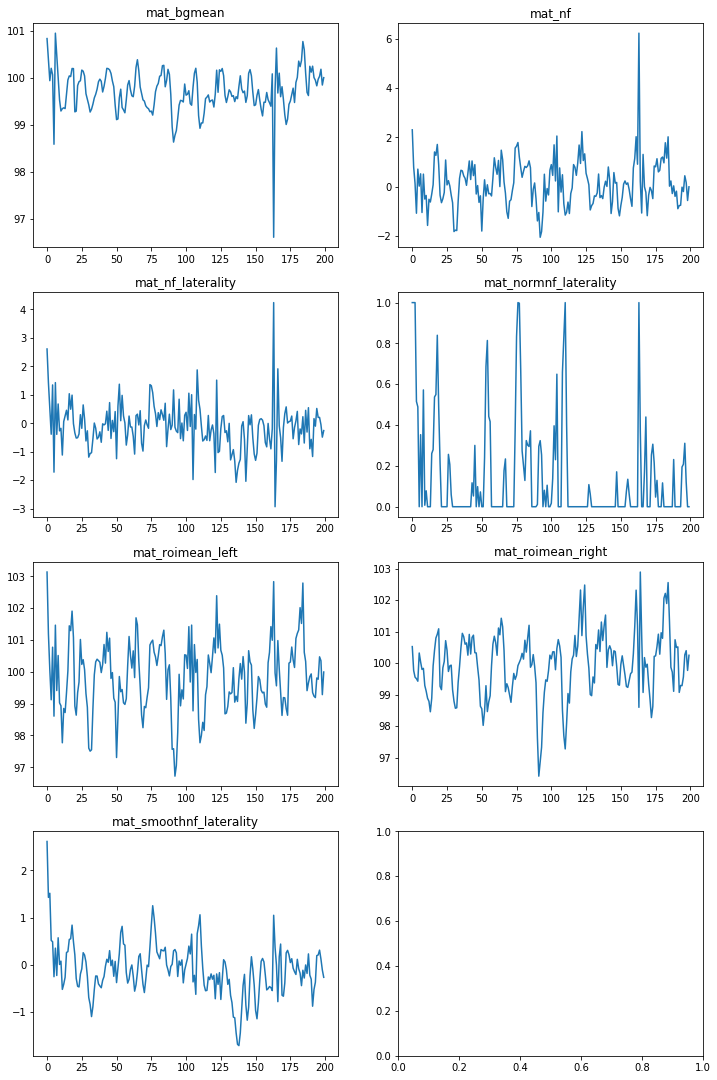

In [105]:
# Display the different NF scores variables. 
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (12, 19))
axes[0, 0].plot(mat_bgmean)
axes[0, 0].set_title('mat_bgmean')
axes[0, 1].plot(mat_nf)
axes[0, 1].set_title('mat_nf')
axes[1, 0].plot(mat_nf_laterality)
axes[1, 0].set_title('mat_nf_laterality')
axes[1, 1].plot(mat_normnf_laterality)
axes[1, 1].set_title('mat_normnf_laterality')
axes[2, 0].plot(mat_roimean_left)
axes[2, 0].set_title('mat_roimean_left')
axes[2, 1].plot(mat_roimean_right)
axes[2, 1].set_title('mat_roimean_right')
axes[3, 0].plot(mat_smoothnf_laterality)
axes[3, 0].set_title('mat_smoothnf_laterality');

### 4.7 Relationship between the predictors

In the following cells, we explore the relationship between the **EEG bandpowers** and the **fMRI BOLD signal**. For the EEG data, we will focus on the C1 channel. For the fMRI data, the primary motor cortex (M1) would be a good region of interest for our analysis, but isolating a specific brain region in our fMRI data would be fairly complex without a dedicated software. Since our objective is just to perform some exploratory analysis, we will simply compute the mean value of the fMRI BOLD signal for the whole brain, and compare it with the values of the EEG bandpowers. 

In [106]:
# Disable warnings. 
import warnings
warnings.filterwarnings('ignore')

In [107]:
# Create a dictionary to hold the results. 
relationship_results = dict()
nb_samples = 200

# Iterate through all subjects. 
for subject_index in subjects:
    
    # Display current subject. 
    print('Starting subject: ' + subject_index)
    
    # Load a NIFTI image for the eegfmriNF run, extract the image data and discard the first scan. 
    img = nib.load(data_path + subject_index + '/func/' +  subject_index + '_task-eegfmriNF_bold.nii.gz')
    image_data = img.get_fdata()
    image_data = image_data[:, :, :, 1:] # Discard the first scan, as indicated in the article. 
    
    # Load the preprocessed EEG data for the eegfmriNF run, and compute the bandpowers for the C1 channel. 
    preprocessed_object = mne.io.read_raw_brainvision(data_path + 'derivatives/' + subject_index + '/eeg_pp/' + subject_index + '_task-eegfmriNF_eeg_pp.vhdr', preload = True)
    eeg_preprocessed_data = preprocessed_object.get_data()
    all_bandpowers = compute_all_bandpowers(eeg_preprocessed_data, c1_channel_index, 2, 2, sampling_frequency)
    
    # Create en empty NumPy array to store the average fMRI BOLD values, as well as the EEG bandpowers. 
    relationship_fMRI_average_EEG_bandpowers = np.zeros((nb_samples, 6))
    
    # Iterate through all samples. 
    for sample_index in range(nb_samples):
        
        # Compute and store the fMRI average values, and store the EEG bandpowers. 
        relationship_fMRI_average_EEG_bandpowers[sample_index, 0] = np.mean(image_data[:, :, :, sample_index])
        relationship_fMRI_average_EEG_bandpowers[sample_index, 1:] = all_bandpowers[sample_index, :]
    
    # Store the results in the dictionary. 
    relationship_results[subject_index] = relationship_fMRI_average_EEG_bandpowers

Starting subject: sub-xp101
Extracting parameters from ../ouroboros_eeg-fmri_nf_raw_data/derivatives/sub-xp101/eeg_pp/sub-xp101_task-eegfmriNF_eeg_pp.vhdr...
Setting channel info structure...
Reading 0 ... 80199  =      0.000 ...   400.995 secs...
Starting subject: sub-xp102
Extracting parameters from ../ouroboros_eeg-fmri_nf_raw_data/derivatives/sub-xp102/eeg_pp/sub-xp102_task-eegfmriNF_eeg_pp.vhdr...
Setting channel info structure...
Reading 0 ... 80199  =      0.000 ...   400.995 secs...
Starting subject: sub-xp103
Extracting parameters from ../ouroboros_eeg-fmri_nf_raw_data/derivatives/sub-xp103/eeg_pp/sub-xp103_task-eegfmriNF_eeg_pp.vhdr...
Setting channel info structure...
Reading 0 ... 80199  =      0.000 ...   400.995 secs...
Starting subject: sub-xp104
Extracting parameters from ../ouroboros_eeg-fmri_nf_raw_data/derivatives/sub-xp104/eeg_pp/sub-xp104_task-eegfmriNF_eeg_pp.vhdr...
Setting channel info structure...
Reading 0 ... 80399  =      0.000 ...   401.995 secs...
Starting

In [108]:
# Check the length of the dictionary. 
len(relationship_results)

10

In [109]:
# Define an example subject. 
subject_index = subjects[0]

# Check the shape of the NumPy array for this subject. 
relationship_results[subject_index].shape

(200, 6)

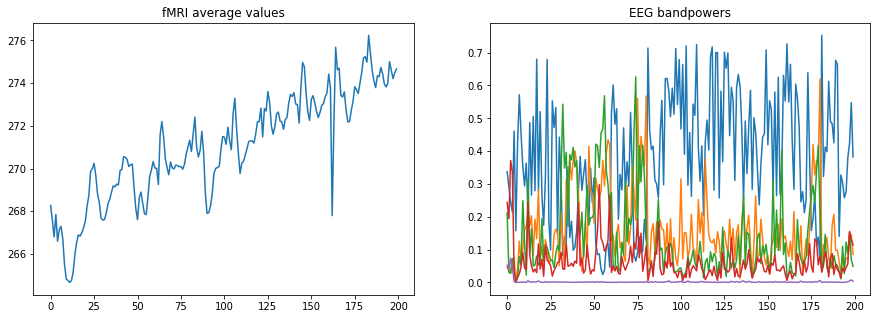

In [110]:
# Display the fMRI average values and the EEG bandpowers. 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
axes[0].plot(relationship_results[subject_index][:, 0])
axes[0].set_title('fMRI average values')
axes[1].plot(relationship_results[subject_index][:, 1:])
axes[1].set_title('EEG bandpowers');

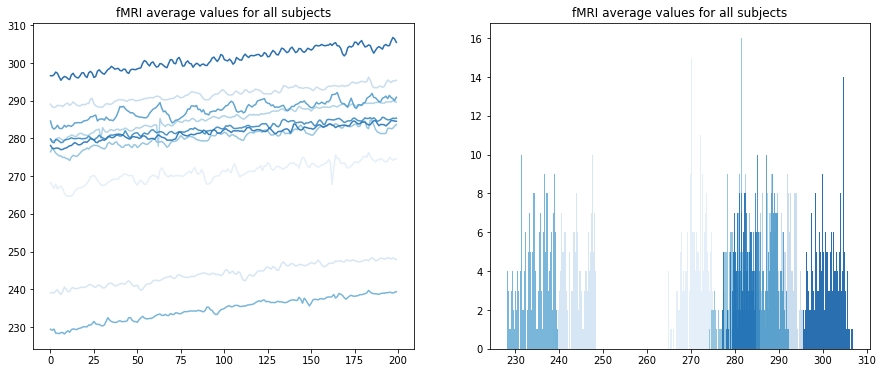

In [111]:
# Display a graph of the fMRI average values for all subjects. 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))
counter = 0

# Iterate through all subjects. 
for subject_index in subjects:
    
    # Define colormap and select a color for the subject. 
    cm = plt.cm.get_cmap('Blues')
    c = cm(0.1 + (0.08 * counter))
    
    # Draw the graphs. 
    axes[0].plot(relationship_results[subject_index][:, 0], color = c, alpha = 0.9)
    axes[0].set_title('fMRI average values for all subjects')
    axes[1].hist(relationship_results[subject_index][:, 0], bins = 50, color = c, alpha = 0.9)
    axes[1].set_title('fMRI average values for all subjects');
    
    # Increment. 
    counter += 1

We can observe that **the BOLD signal tends to increase during the run**, and that the average value of this signal is different across subjects. We can now compute the correlations between the mean BOLD signal and the EEG bandpowers for one subject. 

In [112]:
# Compute the correlations between all variables. 
pd.DataFrame(np.corrcoef(relationship_results[subject_index].T), 
             columns = ['fMRI', 'delta', 'theta', 'alpha', 'beta', 'high beta'], 
             index = ['fMRI', 'delta', 'theta', 'alpha', 'beta', 'high beta'])

,fMRI,delta,theta,alpha,beta,high beta
fMRI,1.000000,-0.248058,-0.216921,-0.139542,0.132868,0.546233
delta,-0.248058,1.000000,0.095581,0.191700,-0.205515,-0.138524
theta,-0.216921,0.095581,1.000000,0.292833,-0.184626,-0.147815
alpha,-0.139542,0.191700,0.292833,1.000000,-0.084848,-0.105012
beta,0.132868,-0.205515,-0.184626,-0.084848,1.000000,0.348998
high beta,0.546233,-0.138524,-0.147815,-0.105012,0.348998,1.000000


In [113]:
import seaborn as sns

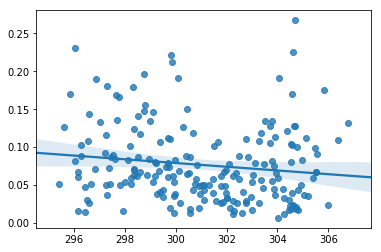

In [114]:
# Display a scatter plot of the fMRI average values and the alpha bandpower, with a regression line. 
sns.regplot(relationship_results[subject_index][:, 0], relationship_results[subject_index][:, 3]);

There is a **certain degree of correlation or anticorrelation between the mean fMRI signal and the EEG bandpowers**, and this correlation or anticorrelation seems different for the different frequency bands. We can now compute these correlations for all the subjects, and average the values obtained across subjects for each of these bands. 

In [115]:
# Create a NumPy array to store the correlations between the fMRI average values and all the EEG bandpowers, for all subjects. 
correlation_results = np.zeros((len(relationship_results), 5))
counter = 0

# Iterate through all subjects. 
for subject_index in subjects:
    
    # Compute the correlations between all variables. 
    correlation_array = np.corrcoef(relationship_results[subject_index].T)
    correlation_results[counter, :] = correlation_array[0, 1:]
    
    # Increment. 
    counter += 1
    
# Store the results in a Pandas DataFrame. 
correlation_results_df = pd.DataFrame(correlation_results, 
                                      columns = ['delta', 'theta', 'alpha', 'beta', 'high beta'], 
                                      index = subjects)
# Display the DataFrame. 
correlation_results_df

,delta,theta,alpha,beta,high beta
sub-xp101,0.209360,-0.079792,-0.210746,-0.225232,-0.176186
sub-xp102,0.040740,-0.122135,0.028665,0.018484,0.124282
sub-xp103,-0.072631,0.027079,0.008507,-0.017478,-0.008990
sub-xp104,-0.057100,-0.035878,0.076449,-0.005172,-0.108576
sub-xp105,0.059504,0.114678,-0.022698,-0.133842,-0.123803
sub-xp106,0.012763,-0.064492,0.004623,-0.165560,-0.183564
sub-xp107,-0.089922,0.166087,0.201063,-0.082120,-0.002894
sub-xp108,-0.081861,-0.020089,0.172682,0.196799,-0.032038
sub-xp109,-0.024374,0.069542,0.065754,0.009651,-0.214049
sub-xp110,-0.248058,-0.216921,-0.139542,0.132868,0.546233


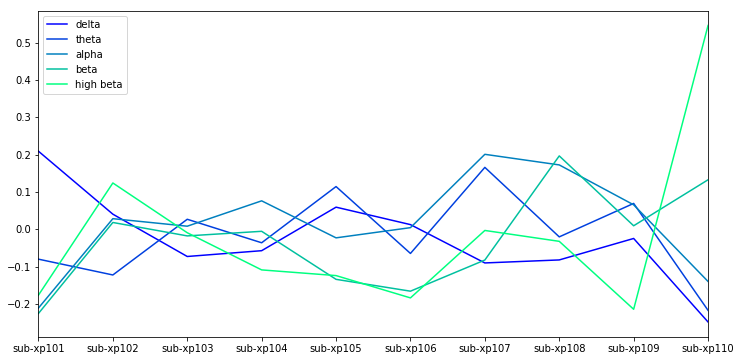

In [116]:
# Display the correlation coefficients in a plot. 
correlation_results_df.plot(figsize = (12, 6), cmap = 'winter');

In [117]:
# Compute the sum of the correlation coefficients per frequency band. 
correlation_results_df.sum()

delta       -0.251580
theta       -0.161922
alpha        0.184759
beta        -0.271604
high beta   -0.179585
dtype: float64

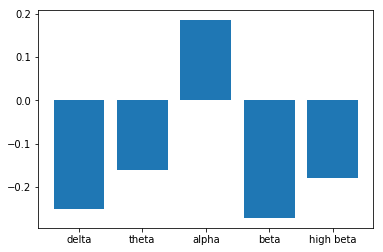

In [118]:
# Display the sum of the correlation coefficients per frequency band. 
plt.bar(range(1, 6), correlation_results_df.sum(), tick_label = correlation_results_df.columns);

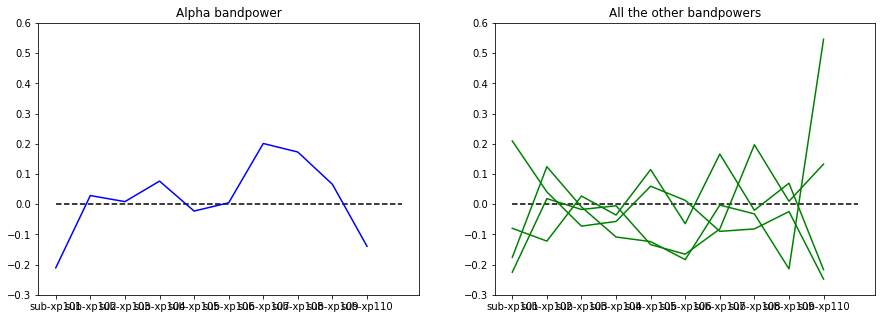

In [119]:
# Display the correlation coefficients for the alpha band versus all the other bands. 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
axes[0].plot(correlation_results_df.loc[:, ['alpha']], color = 'blue')
axes[0].hlines(0, 0, 10, linestyles = 'dashed')
axes[0].set_ylim(-0.3, 0.6)
axes[0].set_title('Alpha bandpower')
axes[1].plot(correlation_results_df.loc[:, ['delta', 'theta', 'beta', 'high beta']], color = 'green')
axes[1].hlines(0, 0, 10, linestyles = 'dashed')
axes[1].set_ylim(-0.3, 0.6)
axes[1].set_title('All the other bandpowers');

There seem to be a **higher correlation between the fMRI BOLD signal and the alpha bandpower** than between the fMRI BOLD signal and any other bandpower. This is quite interesting, since the alpha bandpower is indeed the one that was used to compute the EEG NF scores that were presented to the subjects. It would make sense to imagine that during this NF experiment, the alpha bandpower is indeed the most relevant to explain the increase in fMRI activity. Of course, the mean BOLD signal is a very rough measure of the brain activity. Our machine learning models will use the fMRI data in its true form, i.e. the BOLD signal measured voxel by voxel. Still, we can see that even this first step suggests some patterns of correlation between EEG bandpowers and fMRI data. 

## **5. Data preprocessing**

### 5.1 EEG bandpowers computation

In the following cells, **we compute the EEG bandpowers for the delta, theta, alpha, beta and high beta frequencies**, using two different samplings. The C1 channel is the most relevant for our analysis, since this position corresponds roughly to the left primary motor cortex (M1), the brain area that should be involved in motor imagery of the right hand. Therefore, for all the subjects, we will compute the EEG bandpowers for the C1 channel, but for the first subject of our dataset, we will also compute these bandpowers for all the other channels. 

In [120]:
# Create dictionaries to hold the EEG predictors. 
predictors_EEG_200_samples = dict()
predictors_EEG_1600_samples = dict()

# Iterate through all subjects. 
for subject_index in subjects:
    
    # Display current subject. 
    print('Starting subject: ' + subject_index)
    
    # Load the preprocessed EEG data for the eegfmriNF run, and compute the bandpowers. 
    preprocessed_object = mne.io.read_raw_brainvision(data_path + 'derivatives/' + subject_index + '/eeg_pp/' + subject_index + '_task-eegfmriNF_eeg_pp.vhdr', preload = True)
    eeg_preprocessed_data = preprocessed_object.get_data()
    eeg_preprocessed_data = eeg_preprocessed_data[:, :80200] # Correct for subject sub-xp104, who has a length of 80400 while all the others have a length of 80200. 
    all_bandpowers_200_samples = compute_all_bandpowers(eeg_preprocessed_data, c1_channel_index, 2, 2, sampling_frequency)
    all_bandpowers_1600_samples = compute_all_bandpowers(eeg_preprocessed_data, c1_channel_index, 2, 0.25, sampling_frequency)
    all_bandpowers_1600_samples = all_bandpowers_1600_samples[2:-2, :] # Remove the two first and two last data points, corresponding to incomplete windows. 
    
    # Store the results in the dictionaries. 
    predictors_EEG_200_samples[subject_index] = all_bandpowers_200_samples
    predictors_EEG_1600_samples[subject_index] = all_bandpowers_1600_samples

Starting subject: sub-xp101
Extracting parameters from ../ouroboros_eeg-fmri_nf_raw_data/derivatives/sub-xp101/eeg_pp/sub-xp101_task-eegfmriNF_eeg_pp.vhdr...
Setting channel info structure...
Reading 0 ... 80199  =      0.000 ...   400.995 secs...
Starting subject: sub-xp102
Extracting parameters from ../ouroboros_eeg-fmri_nf_raw_data/derivatives/sub-xp102/eeg_pp/sub-xp102_task-eegfmriNF_eeg_pp.vhdr...
Setting channel info structure...
Reading 0 ... 80199  =      0.000 ...   400.995 secs...
Starting subject: sub-xp103
Extracting parameters from ../ouroboros_eeg-fmri_nf_raw_data/derivatives/sub-xp103/eeg_pp/sub-xp103_task-eegfmriNF_eeg_pp.vhdr...
Setting channel info structure...
Reading 0 ... 80199  =      0.000 ...   400.995 secs...
Starting subject: sub-xp104
Extracting parameters from ../ouroboros_eeg-fmri_nf_raw_data/derivatives/sub-xp104/eeg_pp/sub-xp104_task-eegfmriNF_eeg_pp.vhdr...
Setting channel info structure...
Reading 0 ... 80399  =      0.000 ...   401.995 secs...
Starting

In [121]:
# Define an example subject. 
subject_index = subjects[0]

# Check the number of channels. 
nb_channels = len(preprocessed_object.ch_names)

# Create NumPy arrays to hold the EEG predictors. 
predictors_EEG_single_subject_all_channels_200_samples = np.zeros((200, 5 * nb_channels))
predictors_EEG_single_subject_all_channels_1600_samples = np.zeros((1600, 5 * nb_channels))

# Load the preprocessed EEG data for the eegfmriNF run. 
preprocessed_object = mne.io.read_raw_brainvision(data_path + 'derivatives/' + subject_index + '/eeg_pp/' + subject_index + '_task-eegfmriNF_eeg_pp.vhdr', preload = True)
eeg_preprocessed_data = preprocessed_object.get_data()

# Iterate through all channels. 
for channel_index in range(nb_channels):
    
    # Display current channel. 
    print('Starting channel: ' + str(channel_index))
    
    # Load the preprocessed EEG data for the eegfmriNF run, and compute the bandpowers. 
    all_bandpowers_200_samples = compute_all_bandpowers(eeg_preprocessed_data, c1_channel_index, 2, 2, sampling_frequency)
    all_bandpowers_1600_samples = compute_all_bandpowers(eeg_preprocessed_data, c1_channel_index, 2, 0.25, sampling_frequency)
    all_bandpowers_1600_samples = all_bandpowers_1600_samples[2:-2, :] # Remove the two first and two last data points, corresponding to incomplete windows. 
    
    # Store the results in the NumPy arrays. 
    predictors_EEG_single_subject_all_channels_200_samples[:, (5 * channel_index):(5 * channel_index + 5)] = all_bandpowers_200_samples
    predictors_EEG_single_subject_all_channels_1600_samples[:, (5 * channel_index):(5 * channel_index + 5)] = all_bandpowers_1600_samples

Extracting parameters from ../ouroboros_eeg-fmri_nf_raw_data/derivatives/sub-xp101/eeg_pp/sub-xp101_task-eegfmriNF_eeg_pp.vhdr...
Setting channel info structure...
Reading 0 ... 80199  =      0.000 ...   400.995 secs...
Starting channel: 0
Starting channel: 1
Starting channel: 2
Starting channel: 3
Starting channel: 4
Starting channel: 5
Starting channel: 6
Starting channel: 7
Starting channel: 8
Starting channel: 9
Starting channel: 10
Starting channel: 11
Starting channel: 12
Starting channel: 13
Starting channel: 14
Starting channel: 15
Starting channel: 16
Starting channel: 17
Starting channel: 18
Starting channel: 19
Starting channel: 20
Starting channel: 21
Starting channel: 22
Starting channel: 23
Starting channel: 24
Starting channel: 25
Starting channel: 26
Starting channel: 27
Starting channel: 28
Starting channel: 29
Starting channel: 30
Starting channel: 31
Starting channel: 32
Starting channel: 33
Starting channel: 34
Starting channel: 35
Starting channel: 36
Starting chan

### 5.2 fMRI data cleaning

In the following cells, we remove from the fMRI data of every subject the **voxels that are not relevant for our analysis**, i.e. the voxels outside the brain. In order to determine roughly the position of these voxels, we examine the distribution of the BOLD signal values, and choose a threshold under which we will transform the values to NaN. In neuroimaging studies, more sophisticated methods are used to distinguish the voxels that are located inside the brain from those that lie outside. Since our brain maps have not been normalized on the MNI template, each subject will be treated individually, and the **voxels that will be removed may vary across subjects**. Nevertheless, we want the features space to be coherent inside a single subject data, therefore we will make sure that the **voxels that will be removed are the same for every scan of a particular subject**. We will attain this objective by using binary masks. 

In [122]:
# Define an example subject. 
subject_index = subjects[0]

# Load a NIFTI image using the NiBabel library, and display its size. 
img = nib.load(data_path + subject_index + '/func/' +  subject_index + '_task-eegfmriNF_bold.nii.gz')
img.shape

(106, 106, 32, 210)

In [123]:
# Extract the image data, and display its size. 
image_data = img.get_fdata()
image_data.shape

(106, 106, 32, 210)

In [124]:
# Display the number of scans. 
nb_scans = image_data.shape[3]
nb_scans

210

In [125]:
# Compute the sum of all the scans, and display the size of the new array. 
sum_image_data = np.sum(image_data, axis = 3)
sum_image_data.shape

(106, 106, 32)

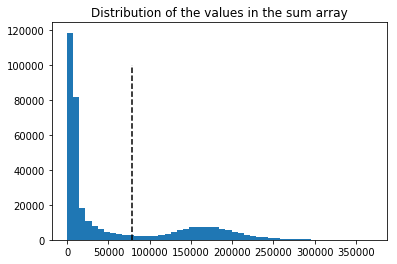

In [126]:
# Define a percentile under which the values will be transformed to NaN. 
percentile_threshold = 72

# Compute the value associated with this percentile. 
nan_threshold = np.percentile(sum_image_data.flatten(), percentile_threshold)

# Display an histogram of the values of the sum array. 
plt.hist(sum_image_data.flatten(), bins = 50)
plt.vlines(nan_threshold, 0, 1e5, linestyles = 'dashed')
plt.title('Distribution of the values in the sum array');

Here we show the **threshold** that will distinguish the voxel values that we will keep from those that we will transform to NaN. Applied on the sum image consisting on the average of all scans, this threshold will allow us to determine the positions of the relevant voxels, i.e. the ones that we will keep, and to store them in a binary mask. 

In [127]:
# Compute a 3D binary mask. 
binary_mask_3d = sum_image_data > nan_threshold
binary_mask_3d.shape

(106, 106, 32)

Now in order to apply the mask to all scans, the cleanest way seems to be a transformation of the 3D binary mask into a 4D binary mask, where the Boolean values are repeated along a 4th dimension. 

In [128]:
# Convert it to a 4D binary mask, by repeating the Boolean values along a 4th dimension. 
binary_mask_4d = np.repeat(binary_mask_3d[:, :, :, np.newaxis], nb_scans, axis = 3)
binary_mask_4d.shape

(106, 106, 32, 210)

In [129]:
# Check that the 4D binary mask consists, as intended, of a repetition of the 3D binary mask along the 4th dimension. 
mask_repeated_per_scan = []
for scan_index in range(nb_scans):
    mask_repeated_per_scan.append(np.array_equal(binary_mask_4d[:, :, :, scan_index], binary_mask_3d))
np.unique(np.array(mask_repeated_per_scan))

array([ True])

In [130]:
# Check the proportion of True values in the 4D binary mask. 
np.sum(binary_mask_4d) / np.prod(binary_mask_4d.shape)

0.2799956612673549

In [131]:
# Compare this proportion with the proportion predicted from the threshold. 
(100 - percentile_threshold) / 100

0.28

The 4D binary mask seems to be constructed as intended. Depending on the percentile chosen, the proportion of True values in the 4D binary mask may be slightly different from the one predicted from the threshold, but should be very close. Now we can use it to select the relevant values in the brain image. 

In [132]:
# Transform values to NaN according to the binary mask. 
image_data_with_nan = image_data.copy()
image_data_with_nan[~binary_mask_4d] = np.nan
image_data_with_nan.shape

(106, 106, 32, 210)

In [133]:
# Check the proportion of NaN values in the modified array. 
np.sum(np.isnan(image_data_with_nan)) / np.prod(image_data_with_nan.shape)

0.720004338732645

In [134]:
# Check that the proportion of NaN values is constant for the different scans. 
nan_per_scan = []
for scan_index in range(nb_scans):
    nan_per_scan.append(np.sum(np.isnan(image_data_with_nan[:, :, :, scan_index])) /
                        np.prod(image_data_with_nan[:, :, :, scan_index].shape))

# Display the unique number of proportion of NaN values. 
np.unique(np.array(nan_per_scan))

array([0.72000434])

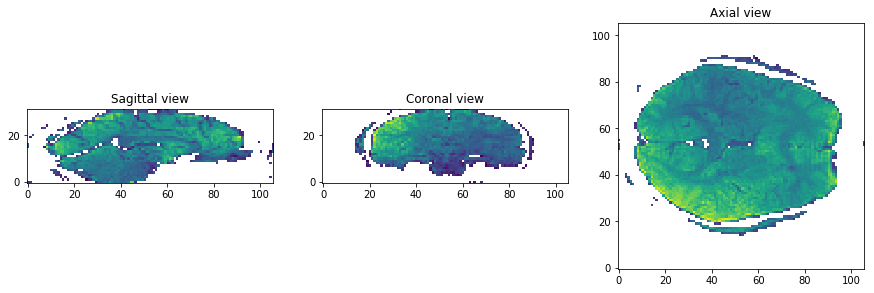

In [135]:
# Display sections of an image through the sagittal, coronal and axial views, using the middle sections coordinates. 
display_fMRI_image(image_data_with_nan, middle_coord)

The preprocessed image seems fine for this subject: the **brain regions are mostly preserved**, while the **volumes outside the brain are transformed to NaN**. Since the brain maps in our fMRI data are not normalized, it makes sense to have a look at the preprocessed images for all our subjects, and see if the threshold we have chosen still gives accurate results. We will take advantage of this step to store directly all the preprocessed images in a dictionary, in order to use them for our machine learning models if they seem acceptable. 

Starting subject: sub-xp101
Starting subject: sub-xp102
Starting subject: sub-xp103
Starting subject: sub-xp104
Starting subject: sub-xp105
Starting subject: sub-xp106
Starting subject: sub-xp107
Starting subject: sub-xp108
Starting subject: sub-xp109
Starting subject: sub-xp110


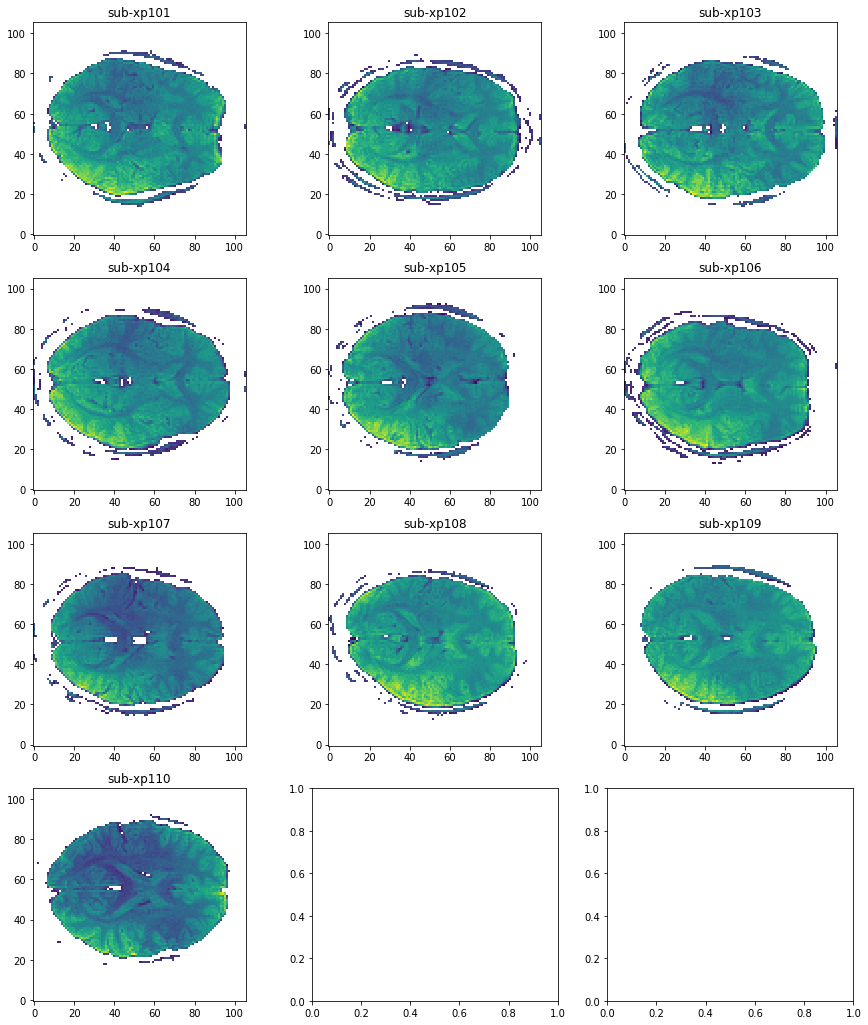

In [136]:
# Create a dictionary to hold the results. 
predictors_fMRI = dict()
nb_scans = 200

# Compare the 3D images between all subjects. 
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (15, 18))
counter = 0

# Iterate through all subjects. 
for subject_index in subjects:
    
    # Display current subject. 
    print('Starting subject: ' + subject_index)
    
    # Load a NIFTI image and extract the image data. 
    img = nib.load(data_path + subject_index + '/func/' +  subject_index + '_task-eegfmriNF_bold.nii.gz')
    image_data = img.get_fdata()
    image_data = image_data[:, :, :, 1:(nb_scans + 1)] # Discard the first scan and take the nb_scans following scans. 
    
    # Compute the sum of all the scans, and the value associated with the chosen percentile. 
    sum_image_data = np.sum(image_data, axis = 3)
    nan_threshold = np.percentile(sum_image_data.flatten(), percentile_threshold)
    
    # Compute a 3D binary mask, and convert it to a 4D binary mask by repeating the Boolean values along a 4th dimension. 
    binary_mask_3d = sum_image_data > nan_threshold
    binary_mask_4d = np.repeat(binary_mask_3d[:, :, :, np.newaxis], nb_scans, axis = 3)
    
    # Transform values to NaN according to the binary mask. 
    image_data_with_nan = image_data.copy()
    image_data_with_nan[~binary_mask_4d] = np.nan
    
    # Store the results in the dictionary. 
    predictors_fMRI[subject_index] = image_data_with_nan
    
    # Compute the row and column indexes. 
    row_index = counter // 3
    column_index = counter % 3
    
    # Display sections of an image through the axial view, using the middle sections coordinates. 
    axes[row_index, column_index].imshow(image_data_with_nan[:, :, middle_coord[2], 0], origin = 'lower')
    axes[row_index, column_index].set_title(subject_index);
    
    # Increment. 
    counter += 1

As we can see, the threshold we have chosen produces results of **reasonable quality**. In all subjects, small parts of the brain are transformed to NaN, and some volumes outside the brain manage to stand above the threshold, but overall the shape of the brain is always clearly visible. Since we will run our machine learning models at a single-subject level, in theory there is no need to apply an identical preprocessing across all subjects. For example, we could use a different threshold for each subject, but this would be very time-consuming, and establishing adequate quality criteria would be a challenge. Instead, we will assume that these preprocessed images are good enough for our purposes. 

### 5.3 Voxel size rescaling

**The high number of voxel values (106 x 106 x 32 x 200 = 71,910,400 values per 4D array) is certainly one of the key challenges for the use of machine learning models on the fMRI data.** Even for a single scan, the number of voxel values remains quite high (106 x 106 x 32 = 359,552 values per 3D image). One way to address this problem is to reduce the size of the arrays by averaging, on the 3D images, several contiguous voxels into higher-level clusters. In the function below, we use the NumPy function "mean", therefore the clusters containing at least one NaN voxel will be entirely considered as NaN, which is the most conservative way to manage missing values during rescaling. 

In [137]:
# Define the rescaling function. 
def rescale_image_by_factor(image_data, factor):
    
    # Get the dimensions of the image data, and create a new, rescaled, image data array. 
    dimensions = np.append((np.array(image_data.shape[0:3]) / factor).astype('int'), image_data.shape[3])
    new_image_data = np.zeros((dimensions))
    
    # Loop over all voxels in the new image data. 
    for x_coord in range(0, dimensions[0]):
        for y_coord in range(0, dimensions[1]):
            for z_coord in range(0, dimensions[2]):
                new_image_data[x_coord, y_coord, z_coord, :] = np.mean(image_data[(factor * x_coord):(factor * x_coord + factor),
                                                                                  (factor * y_coord):(factor * y_coord + factor),
                                                                                  (factor * z_coord):(factor * z_coord + factor),
                                                                                  :], axis = (0, 1, 2))
                
    # Return the new image data and its dimensions. 
    return new_image_data, new_image_data.shape

#### 5.3.1 Original voxel size

In [138]:
# Define an example subject. 
subject_index = subjects[0]

# Load a preprocessed image from our dictionary. 
image_data = predictors_fMRI[subject_index]
image_data.shape

(106, 106, 32, 200)

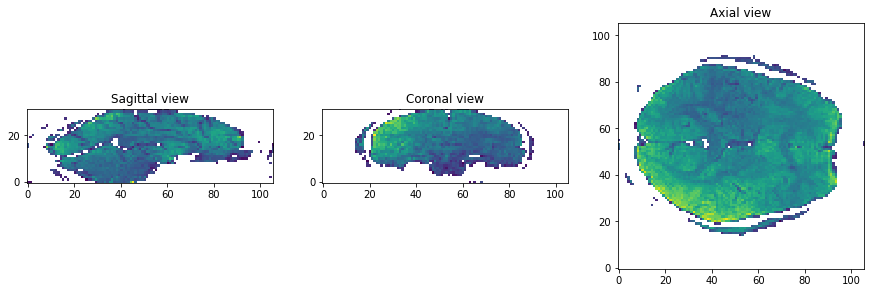

In [139]:
# Display sections of an image through the sagittal, coronal and axial views, using the middle sections coordinates. 
display_fMRI_image(image_data, middle_coord)

#### 5.3.2 Voxel size rescaling by a factor 2

In [140]:
# Rescale the voxel size by a factor 2. 
image_data_r2, image_dimensions_r2 = rescale_image_by_factor(image_data, 2)
image_dimensions_r2

(53, 53, 16, 200)

In [141]:
# Find the middle coordinates for the rescaled image. 
middle_coord_r2 = middle_sections(image_data_r2)
middle_coord_r2

(26, 26, 8, 100)

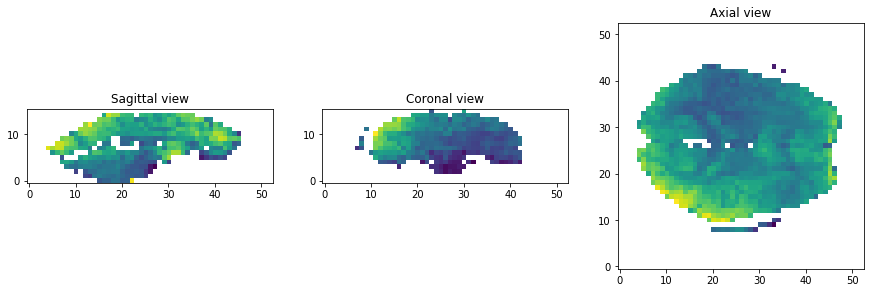

In [142]:
# Display sections of an image through the sagittal, coronal and axial views, using the middle sections coordinates. 
display_fMRI_image(image_data_r2, middle_coord_r2)

In [143]:
# Display the memory usage. 
print('Original image:', str(image_data.nbytes), 'bytes')
print('Rescaled image:', str(image_data_r2.nbytes), 'bytes')
print('The original image is', str(np.round(image_data.nbytes / image_data_r2.nbytes, 2)), 'times heavier than the rescaled image.')

Original image: 575283200 bytes
Rescaled image: 71910400 bytes
The original image is 8.0 times heavier than the rescaled image.


#### 5.3.3 Voxel size rescaling by a factor 3

In [144]:
# Rescale the voxel size by a factor 3. 
image_data_r3, image_dimensions_r3 = rescale_image_by_factor(image_data, 3)
image_dimensions_r3

(35, 35, 10, 200)

In [145]:
# Find the middle coordinates for the rescaled image. 
middle_coord_r3 = middle_sections(image_data_r3)
middle_coord_r3

(17, 17, 5, 100)

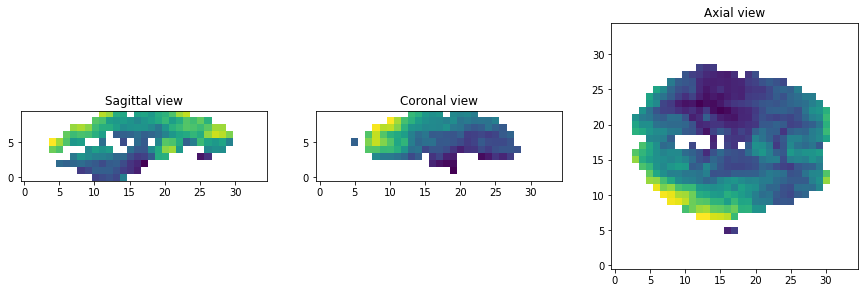

In [146]:
# Display sections of an image through the sagittal, coronal and axial views, using the middle sections coordinates. 
display_fMRI_image(image_data_r3, middle_coord_r3)

In [147]:
# Display the memory usage. 
print('Original image:', str(image_data.nbytes), 'bytes')
print('Rescaled image:', str(image_data_r3.nbytes), 'bytes')
print('The original image is', str(np.round(image_data.nbytes / image_data_r3.nbytes, 2)), 'times heavier than the rescaled image.')

Original image: 575283200 bytes
Rescaled image: 19600000 bytes
The original image is 29.35 times heavier than the rescaled image.


As expected, we see that the rescaled brain images show a rougher distribution of the same patterns. Also as expected, the memory gain factor is about 8 (2 x 2 x 2) for the rescaling by a factor 2, and about 27 (3 x 3 x 3) for the rescaling by a factor 3. We can now run the voxel size rescaling process for all our subjects, and store all the rescaled images in dictionaries. 

In [148]:
# Create dictionaries to hold the results. 
predictors_fMRI_r2 = dict()
predictors_fMRI_r3 = dict()

# Iterate through all subjects. 
for subject_index in subjects:
    
    # Display current subject. 
    print('Starting subject: ' + subject_index)
    
    # Load the preprocessed image with the original voxel size. 
    image_data = predictors_fMRI[subject_index]
    
    # Rescale the voxel size by a factor 2, and store the result in the appropriate dictionary. 
    image_data_r2, _ = rescale_image_by_factor(image_data, 2)
    predictors_fMRI_r2[subject_index] = image_data_r2
    
    # Rescale the voxel size by a factor 3, and store the result in the appropriate dictionary. 
    image_data_r3, _ = rescale_image_by_factor(image_data, 3)
    predictors_fMRI_r3[subject_index] = image_data_r3

Starting subject: sub-xp101
Starting subject: sub-xp102
Starting subject: sub-xp103
Starting subject: sub-xp104
Starting subject: sub-xp105
Starting subject: sub-xp106
Starting subject: sub-xp107
Starting subject: sub-xp108
Starting subject: sub-xp109
Starting subject: sub-xp110


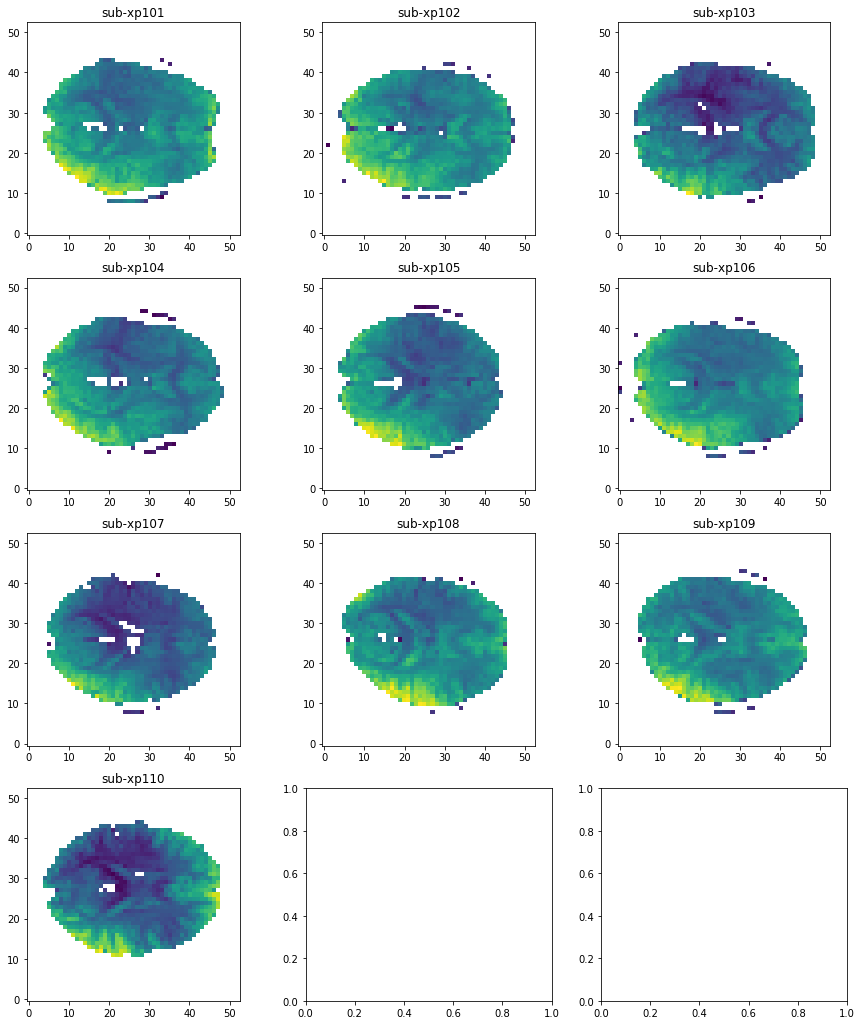

In [149]:
# Compare the images rescaled by a factor 2 between all subjects. 
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (15, 18))
counter = 0

# Iterate through all subjects. 
for subject_index in subjects:
    
    # Load the rescaled image. 
    rescaled_image_data = predictors_fMRI_r2[subject_index]
    
    # Compute the row and column indexes. 
    row_index = counter // 3
    column_index = counter % 3
    
    # Display sections of an image through the axial view, using the middle sections coordinates. 
    axes[row_index, column_index].imshow(rescaled_image_data[:, :, middle_coord_r2[2], 0], origin = 'lower')
    axes[row_index, column_index].set_title(subject_index);
    
    # Increment. 
    counter += 1

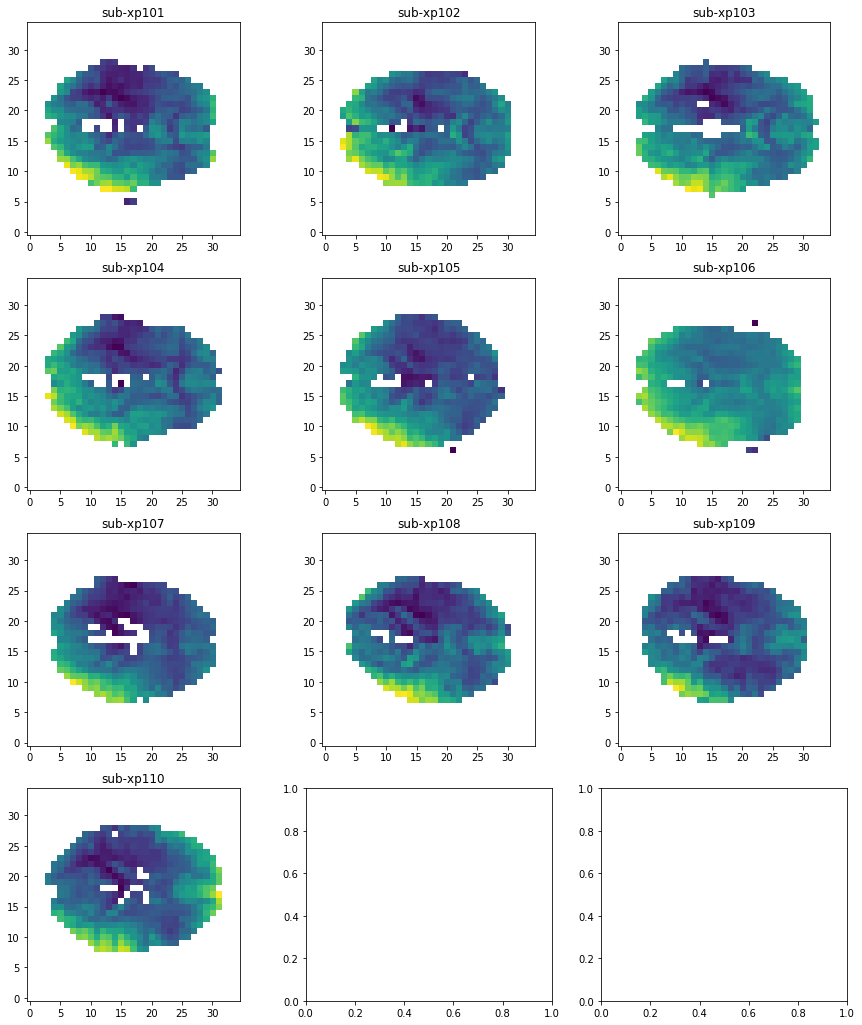

In [150]:
# Compare the images rescaled by a factor 3 between all subjects. 
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (15, 18))
counter = 0

# Iterate through all subjects. 
for subject_index in subjects:
    
    # Load the rescaled image. 
    rescaled_image_data = predictors_fMRI_r3[subject_index]
    
    # Compute the row and column indexes. 
    row_index = counter // 3
    column_index = counter % 3
    
    # Display sections of an image through the axial view, using the middle sections coordinates. 
    axes[row_index, column_index].imshow(rescaled_image_data[:, :, middle_coord_r3[2], 0], origin = 'lower')
    axes[row_index, column_index].set_title(subject_index);
    
    # Increment. 
    counter += 1

Since we managed missing values in the most conservative way, by considering as NaN all clusters that contain at least one NaN voxel, some brain images have now more NaN values in cerebral regions. As a security check, we will compute and display the **remaining number of non-NaN values** in our rescaled images. 

In [151]:
# Create a Pandas DataFrame. 
non_nan_proportions = pd.DataFrame(columns = ['original voxel size', 'factor 2', 'factor 3'])

# Iterate through all subjects. 
for subject_index in subjects:
    
    # Load the image with the original voxel size, compute the proportion of non-NaN values and fill in the DataFrame. 
    original_image_data = predictors_fMRI[subject_index]
    non_nan_proportions.loc[subject_index, 'original voxel size'] = 1 - np.isnan(original_image_data).sum() / np.prod(original_image_data.shape)
    
    # Load the rescaled image by a factor 2, compute the proportion of non-NaN values and fill in the DataFrame. 
    rescaled_image_data = predictors_fMRI_r2[subject_index]
    non_nan_proportions.loc[subject_index, 'factor 2'] = 1 - np.isnan(rescaled_image_data).sum() / np.prod(rescaled_image_data.shape)
    
    # Load the rescaled image by a factor 3, compute the proportion of non-NaN values and fill in the DataFrame. 
    rescaled_image_data = predictors_fMRI_r3[subject_index]
    non_nan_proportions.loc[subject_index, 'factor 3'] = 1 - np.isnan(rescaled_image_data).sum() / np.prod(rescaled_image_data.shape)

In [152]:
# Display the DataFrame. 
non_nan_proportions

,original voxel size,factor 2,factor 3
sub-xp101,0.279998,0.23131,0.216163
sub-xp102,0.280001,0.21331,0.194694
sub-xp103,0.279998,0.236205,0.22098
sub-xp104,0.280001,0.228418,0.214449
sub-xp105,0.280001,0.233446,0.22049
sub-xp106,0.279996,0.2142,0.194939
sub-xp107,0.280001,0.225481,0.210612
sub-xp108,0.280001,0.232578,0.221061
sub-xp109,0.280001,0.237518,0.225878
sub-xp110,0.280001,0.23823,0.221633


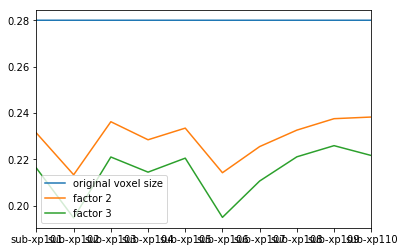

In [153]:
# Display the content of the DataFrame with a graph. 
non_nan_proportions.plot();

We can see that the proportion of non-NaN values in the rescaled images is variable among our subjects. Still, **all of our subjects contain a reasonable proportion of non-NaN data**, taking into consideration that the number of voxels in our images is relatively high. 

### 5.4 Principal Component Analysis (PCA) on fMRI data

In the following cells, we perform a Principal Component Analysis (PCA) on the fMRI data after the preprocessing, taking only the non-NaN values, in order to **obtain a new array with 200 x 200 features, and a smaller one with 200 x 10 features**. We also examine the proportion of variance explained. Since the dimensionality is much higher than the cardinality in our dataset, performing a PCA is a natural step to try to reduce this dimensionality. 

In [154]:
# Define an example subject. 
subject_index = subjects[0]

# Load a preprocessed image from our dictionary, and count the number of non-NaN voxels in each 3D image. 
image_data = predictors_fMRI[subject_index]
nb_non_nan_voxels = np.sum(~np.isnan(image_data[:, :, :, 0]))

# Retrieve the number of scans, then create a NumPy array with one row per scan and one column per non-NaN voxel. 
nb_scans = image_data.shape[3]
image_data_pca = np.empty((nb_scans, nb_non_nan_voxels))

# Fill in the array. 
for scan in range(nb_scans):
    flatten_image = image_data[:, :, :, scan].flatten()
    flatten_image = flatten_image[~np.isnan(flatten_image)]
    image_data_pca[scan, :] = flatten_image

# Display the shape of the new array. 
image_data_pca.shape

(200, 100674)

In [155]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [156]:
# Create Standard scaler. 
scaler = StandardScaler()

# Rescale data. 
image_data_pca_rescaled = scaler.fit_transform(image_data_pca)

In [157]:
# Create PCA transformer. 
pca = PCA(n_components = None)

# Apply PCA to the data. 
pca.fit(image_data_pca_rescaled)

# Project data onto the selected components. 
features_pca = pca.transform(image_data_pca_rescaled)

In [158]:
# Display the shape of the features array after PCA. 
features_pca.shape

(200, 200)

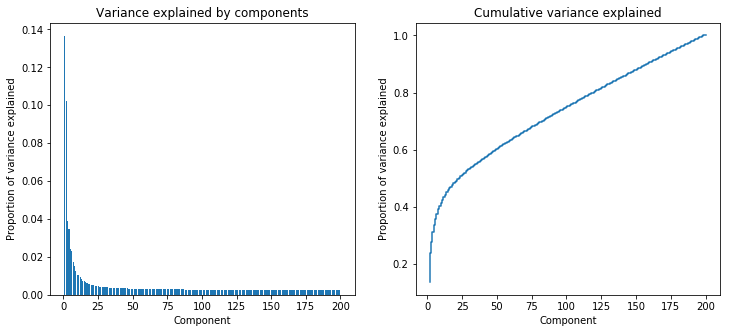

In [159]:
# Get the proportion of variance explained. 
pve = pca.explained_variance_ratio_

# Display a scree plot with two graphs. 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

# Create bar plot. 
xcor = np.arange(1, len(pve) + 1)
axes[0].bar(xcor, pve)
axes[0].set_xlabel('Component')
axes[0].set_ylabel('Proportion of variance explained')
axes[0].set_title('Variance explained by components')

# Create cumulative sum plot. 
pve_cumsum = np.cumsum(pve)
axes[1].step(xcor + 0.5, pve_cumsum)
axes[1].set_xlabel('Component')
axes[1].set_ylabel('Proportion of variance explained')
axes[1].set_title('Cumulative variance explained');

In [160]:
# Verify how many PCA components explain 10%, 20%, …, 90% and 100% of the variance. 
PCA_results = pd.DataFrame()
PCA_results['Percentage explained'] = np.linspace(10, 100, 10, dtype = int)
nb_components = []
for percentage in PCA_results['Percentage explained']:
    idx_under_threshold = (pve_cumsum < percentage / 100)
    nb_components.append(np.sum(idx_under_threshold) + 1)

# Display the results. 
PCA_results['Number of components necessary'] = nb_components
PCA_results

,Percentage explained,Number of components necessary
0,10,1
1,20,2
2,30,4
3,40,9
4,50,23
5,60,50
6,70,83
7,80,120
8,90,158
9,100,201


We can observe a **drop in the variance explained** around the 10th component. This might alert us, since from the events file, we know that the eegfmriNF run was divided in 10 rest/task cycles. Maybe the first 10 components of the PCA reflect mostly the different rest/task cycles? In order to be sure, we plot these components. 

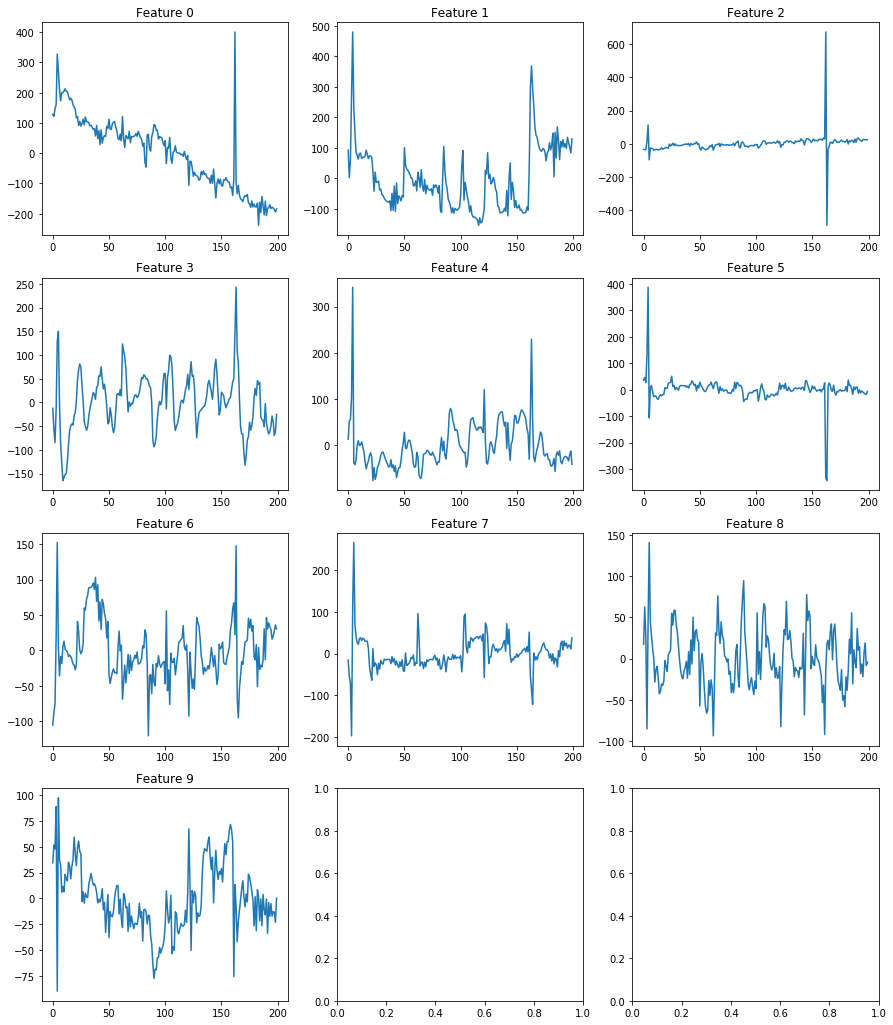

In [161]:
# Display the first 10 PCA features. 
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (15, 18))
counter = 0

# Iterate through the first 10 PCA features. 
for features_pca_index in range(10):
    
    # Compute the row and column indexes. 
    row_index = counter // 3
    column_index = counter % 3
    
    # Display sections of an image through the axial view, using the middle sections coordinates. 
    axes[row_index, column_index].plot(features_pca[:, counter])
    axes[row_index, column_index].set_title('Feature ' + str(counter));
    
    # Increment. 
    counter += 1

If the first 10 components of the PCA reflected mostly the different rest/task cycles in the eegfmriNF run, the graphs would probably look quite different, so this hypothesis seems unlikely. Therefore, in addition to the **PCA with 200 components**, it could be interesting to perform a **PCA restricted to these first 10 components**. We will now compute these new features for all our subjects. 

In [162]:
# Create dictionaries to hold the results. 
predictors_fMRI_PCA_200_components = dict()
predictors_fMRI_PCA_10_components = dict()

# Iterate through all subjects. 
for subject_index in subjects:
    
    # Display current subject. 
    print('Starting subject: ' + subject_index)
    
    # Load a preprocessed image from our dictionary, and count the number of non-NaN voxels in each 3D image. 
    image_data = predictors_fMRI[subject_index]
    nb_non_nan_voxels = np.sum(~np.isnan(image_data[:, :, :, 0]))

    # Retrieve the number of scans, then create a NumPy array with one row per scan and one column per non-NaN voxel. 
    nb_scans = image_data.shape[3]
    image_data_pca = np.empty((nb_scans, nb_non_nan_voxels))

    # Fill in the array. 
    for scan in range(nb_scans):
        flatten_image = image_data[:, :, :, scan].flatten()
        flatten_image = flatten_image[~np.isnan(flatten_image)]
        image_data_pca[scan, :] = flatten_image
        
    # Create Standard scaler and rescale data. 
    scaler = StandardScaler()
    image_data_pca_rescaled = scaler.fit_transform(image_data_pca)

    # Create PCA transformer with 200 components and apply PCA to the data. 
    pca = PCA(n_components = None)
    pca.fit(image_data_pca_rescaled)
    features_pca_200_components = pca.transform(image_data_pca_rescaled)
    
    # Create PCA transformer with 10 components and apply PCA to the data. 
    pca = PCA(n_components = 10)
    pca.fit(image_data_pca_rescaled)
    features_pca_10_components = pca.transform(image_data_pca_rescaled)
    
    # Store the results. 
    predictors_fMRI_PCA_200_components[subject_index] = features_pca_200_components
    predictors_fMRI_PCA_10_components[subject_index] = features_pca_10_components

Starting subject: sub-xp101
Starting subject: sub-xp102
Starting subject: sub-xp103
Starting subject: sub-xp104
Starting subject: sub-xp105
Starting subject: sub-xp106
Starting subject: sub-xp107
Starting subject: sub-xp108
Starting subject: sub-xp109
Starting subject: sub-xp110


### 5.4 Save the data

We will now save our **EEG bandpowers**, **preprocessed fMRI images**, as well as our **fMRI features after the PCA**, for further use in the next Notebooks. The EEG bandpowers and fMRI features after the PCA can be stored in simple dictionaries, and saved into a Pickle file. For the preprocessed fMRI images, which are much heavier and consist of NumPy arrays, it is better to use the NumPy .npz format. 

In [163]:
import pickle

In [164]:
# Save all the EEG predictors into a Pickle file. 
with open(preprocessed_data_path + 'predictors_EEG_200_samples.p', 'wb') as file:
    pickle.dump(predictors_EEG_200_samples, file)
with open(preprocessed_data_path + 'predictors_EEG_1600_samples.p', 'wb') as file:
    pickle.dump(predictors_EEG_1600_samples, file)
with open(preprocessed_data_path + 'predictors_EEG_single_subject_all_channels_200_samples.p', 'wb') as file:
    pickle.dump(predictors_EEG_single_subject_all_channels_200_samples, file)
with open(preprocessed_data_path + 'predictors_EEG_single_subject_all_channels_1600_samples.p', 'wb') as file:
    pickle.dump(predictors_EEG_single_subject_all_channels_1600_samples, file)

# Save all the fMRI features after the PCA into a Pickle file. 
with open(preprocessed_data_path + 'predictors_fMRI_PCA_200_components.p', 'wb') as file:
    pickle.dump(predictors_fMRI_PCA_200_components, file)
with open(preprocessed_data_path + 'predictors_fMRI_PCA_10_components.p', 'wb') as file:
    pickle.dump(predictors_fMRI_PCA_10_components, file)

In [165]:
# Save all the fMRI predictors into a .npz file. 
np.savez(preprocessed_data_path + 'predictors_fMRI.npz', 

         # fMRI predictors. 
         sub_1 = predictors_fMRI['sub-xp101'],
         sub_2 = predictors_fMRI['sub-xp102'],
         sub_3 = predictors_fMRI['sub-xp103'],
         sub_4 = predictors_fMRI['sub-xp104'],
         sub_5 = predictors_fMRI['sub-xp105'],
         sub_6 = predictors_fMRI['sub-xp106'],
         sub_7 = predictors_fMRI['sub-xp107'],
         sub_8 = predictors_fMRI['sub-xp108'],
         sub_9 = predictors_fMRI['sub-xp109'],
         sub_10 = predictors_fMRI['sub-xp110'])

In [166]:
# Save all the fMRI predictors, with a rescaling factor of 2, into a .npz file. 
np.savez(preprocessed_data_path + 'predictors_fMRI_r2.npz', 

         # fMRI predictors. 
         sub_1 = predictors_fMRI_r2['sub-xp101'],
         sub_2 = predictors_fMRI_r2['sub-xp102'],
         sub_3 = predictors_fMRI_r2['sub-xp103'],
         sub_4 = predictors_fMRI_r2['sub-xp104'],
         sub_5 = predictors_fMRI_r2['sub-xp105'],
         sub_6 = predictors_fMRI_r2['sub-xp106'],
         sub_7 = predictors_fMRI_r2['sub-xp107'],
         sub_8 = predictors_fMRI_r2['sub-xp108'],
         sub_9 = predictors_fMRI_r2['sub-xp109'],
         sub_10 = predictors_fMRI_r2['sub-xp110'])

In [167]:
# Save all the fMRI predictors, with a rescaling factor of 3, into a .npz file. 
np.savez(preprocessed_data_path + 'predictors_fMRI_r3.npz', 

         # fMRI predictors. 
         sub_1 = predictors_fMRI_r3['sub-xp101'],
         sub_2 = predictors_fMRI_r3['sub-xp102'],
         sub_3 = predictors_fMRI_r3['sub-xp103'],
         sub_4 = predictors_fMRI_r3['sub-xp104'],
         sub_5 = predictors_fMRI_r3['sub-xp105'],
         sub_6 = predictors_fMRI_r3['sub-xp106'],
         sub_7 = predictors_fMRI_r3['sub-xp107'],
         sub_8 = predictors_fMRI_r3['sub-xp108'],
         sub_9 = predictors_fMRI_r3['sub-xp109'],
         sub_10 = predictors_fMRI_r3['sub-xp110'])